<a href="https://colab.research.google.com/github/kodai-utsunomiya/memorization-and-generalization/blob/main/1_Generalizing_With_1s_and_0s_Do_Machine_Learning_Models_Memorize_or_Generalize%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. データセット


- **入力データ $ X $**: $ n $ 次元のバイナリベクトルから成る．具体的には，各サンプルは長さ $ n $ のバイナリ列．ここでは $ n = 30 $．
- **出力データ $ y $**: $ X $ の最初の $ k $ 次元の合計を2で割った余り．つまり，出力は次のように定義される：
  $$
  y_i = \left(\sum_{j=1}^{k} x_{ij}\right) \mod 2
  $$
  ここで，$ x_{ij} $ は入力ベクトルの $ i $-番目のサンプルの $ j $-番目の要素．

### 2. モデルの定義

- **隠れ層**: $ \mathrm{hidden\_size} $ 個のニューロンを持つ全結合層．活性化関数としてReLUを使用．隠れ層の出力は次のように計算される：
  $$
  h_i = \text{ReLU}(W_{hidden} \cdot x_i)
  $$
  ここで，$ W_{hidden} $ は隠れ層の重み行列．

- **出力層**: 1つのニューロンを持つ全結合層で，出力は次のように計算される：
  $$
  \hat{y}_i = W_{out} \cdot h_i
  $$
  ここで，$ W_{out} $ は出力層の重み行列．出力層の活性化関数はシグモイド関数：
  $$
  \hat{y}_i = \sigma(W_{out} \cdot h_i)
  $$
  ここで，$ \sigma(z) = \frac{1}{1 + \exp(-z)} $．

### 3. 損失関数と正則化

- **損失関数**: バイナリクロスエントロピー損失を使用．損失関数は次のように定義される：
  $$
  \mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\sigma(\hat{y}_i)) + (1 - y_i) \log(1 - \sigma(\hat{y}_i)) \right]
  $$

- **L1正則化**: モデルの重みの絶対値の和に基づく正則化．L1正則化項は次のように定義される：
  $$
  R_{L1} = \lambda \sum_{p} \|w_p\|_1
  $$
  ここで，$ \lambda $ は正則化パラメータ，$ w_p $ はモデルのパラメータ．

- **L2正則化**: モデルの重みの二乗和に基づく正則化．L2正則化項は次のように定義される：
  $$
  R_{L2} = \lambda \sum_{p} \|w_p\|_2^2
  $$
  ここで，$ \lambda $ は正則化パラメータ．

### 4. トレーニングと評価

- **トレーニング**: 各ステップで，ミニバッチのデータを用いて損失を計算し，バックプロパゲーションを行ってパラメータを更新する．損失関数には正則化項も含まれる：
  $$
  \text{Total Loss} = \mathcal{L} + R_{L1} \text{ or } R_{L2}
  $$
  この損失を最適化するために，SGDやAdamなどのオプティマイザを使用する．

- **評価**: 各エポックで，評価データを用いてモデルのパフォーマンスを確認する．評価損失と評価精度を計算．

# データの具体例

### データの生成

1. **入力データ**:
   - 入力データは $ n = 30 $ 次元のバイナリベクトル．
   - 各サンプルは 0 または 1 の値を持つ $ n $ 次元のベクトル．

2. **出力データ**:
   - 出力は，最初の $ k = 3 $ 次元の入力データの合計を2で割った余り．

### 具体例

以下のような入力データと出力データが生成される：

- **入力データ**（最初の5サンプル）:
  $
  \begin{array}{cccccccccccccccccccccccccccc}
  0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
  1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
  0 & 1 & 1 & 0 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 \\
  1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 \\
  0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0
  \end{array}
  $

- **出力データ**:
  - 各サンプルの出力は，最初の $ k = 3 $ 次元の入力データの合計の2で割った余り．
  - 上記の入力データに対する出力は次のように計算される：
    
    \begin{array}{cccc}
    \left(\sum_{j=1}^{3} 0, 1, 0 \right) \mod 2 = \left(1\right) \mod 2 = 1 \\
    \left(\sum_{j=1}^{3} 1, 0, 1 \right) \mod 2 = \left(2\right) \mod 2 = 0 \\
    \left(\sum_{j=1}^{3} 0, 1, 1 \right) \mod 2 = \left(2\right) \mod 2 = 0 \\
    \left(\sum_{j=1}^{3} 1, 0, 0 \right) \mod 2 = \left(1\right) \mod 2 = 1 \\
    \left(\sum_{j=1}^{3} 0, 1, 0 \right) \mod 2 = \left(1\right) \mod 2 = 1
    \end{array}
    

  したがって，出力データは次のようになる：
  $
  \begin{array}{cccc}
  1 \\
  0 \\
  0 \\
  1 \\
  1
  \end{array}
  $

# 学習の流れ

### 1. **データの次元**

#### 訓練データとテストデータ

- **入力データ**: $ \mathbf{X} \in \mathbb{R}^{N \times (n + 1)} $
  - $ N $: サンプル数（訓練データは `hyper['train_size']`，テストデータは `hyper['test_size']`）
  - $ n $: 特徴量の次元（ここでは 30）
  - バイアス項を追加することで，特徴量の次元が $ n + 1 $ になる．
  
- **出力ラベル**: $ \mathbf{y} \in \mathbb{R}^{N} $
  - 出力ラベルは各サンプルに対して 0 または 1 の二値．

### 2. **モデルの構造**

- **隠れ層**:
  - 入力次元: $ n + 1 $（特徴量 + バイアス項）
  - 出力次元: `hyper['hidden_size']`（ここでは 32）
  
  $
  \mathbf{h} = \text{ReLU}(\mathbf{X} \mathbf{W}_1 + \mathbf{b}_1)
  $
  - $ \mathbf{W}_1 \in \mathbb{R}^{(n + 1) \times \text{hidden_size}} $
  - $ \mathbf{b}_1 $ はバイアス項（ここでは使用していない）

- **出力層**:
  - 入力次元: `hyper['hidden_size']`（ここでは 32）
  - 出力次元: 1
  
  $
  \mathbf{y}_{\text{pred}} = \mathbf{h} \mathbf{W}_2 + \mathbf{b}_2
  $
  - $ \mathbf{W}_2 \in \mathbb{R}^{\text{hidden_size} \times 1} $
  - $ \mathbf{b}_2 $ はバイアス項（ここでは使用していない）

### 3. **トレーニングステップ**

1. **フォワードパス**:
   - 入力データ $ \mathbf{X} $ に対して，モデルの隠れ層と出力層を通して予測値を計算する．

   $
   \mathbf{h} = \text{ReLU}(\mathbf{X} \mathbf{W}_1)
   $

   $
   \mathbf{y}_{\text{pred}} = \mathbf{h} \mathbf{W}_2
   $

   次に，出力をシグモイド関数で変換して確率を得る．

   $
   \hat{\mathbf{y}} = \sigma(\mathbf{y}_{\text{pred}})
   $

   ここで，$ \sigma $ はシグモイド関数 $\sigma (z) = \frac{1}{1 + e^{-z}}$．

2. **損失計算**:
   - 損失関数として `BCEWithLogitsLoss`（バイナリ交差エントロピー損失）を使用．

   $
   \text{loss} = \text{BCEWithLogitsLoss}(\hat{\mathbf{y}}, \mathbf{y})
   $

   正則化項が加えられる（L1 または L2）．

   - L1正則化

   $
   \text{L1_Regularization} = \text{weight_decay} \times \sum_{i} \|\mathbf{W}_i\|_1
   $

   - L2正則化

   $
   \text{L2_Regularization} = \text{weight_decay} \times \sum_{i} \|\mathbf{W}_i\|_2^2
   $

   $
   \mathrm{total\_loss} = \text{loss} + \text{Regularization}
   $

3. **バックプロパゲーション**:
   - 損失関数に基づいて勾配を計算し，パラメータを更新する．

   $
   \mathbf{W}_1 \leftarrow \mathbf{W}_1 - \eta \frac{\partial \mathrm{total\_loss}}{\partial \mathbf{W}_1}
   $

   $
   \mathbf{W}_2 \leftarrow \mathbf{W}_2 - \eta \frac{\partial \mathrm{total\_loss}}{\partial \mathbf{W}_2}
   $

   ここで，$ \eta $ は学習率．

### 4. **評価ステップ**

1. **フォワードパス**:
   - 評価データ $ \mathbf{X}_{\text{eval}} $ に対して，モデルの出力を計算する．

   $
   \mathbf{h}_{\text{eval}} = \text{ReLU}(\mathbf{X}_{\text{eval}}\mathbf{W}_1)
   $

   $
   \mathbf{y}c = \mathbf{h}_{\text{eval}} \mathbf{W}_2
   $

   - 出力をシグモイド関数で変換して確率を得る．

   $
   \hat{\mathbf{y}}_{\text{pred}} = \sigma(\mathbf{y}_{\mathrm{pred\_eval}})
   $

2. **損失と精度の計算**:
   - 損失と精度を計算する．

   $
   \mathrm{eval\_loss} = \text{BCEWithLogitsLoss}(\hat{\mathbf{y}}_{\text{eval}}, \mathbf{y}_{\text{eval}})
   $

   $
   \text{accuracy} = \frac{\text{correct predictions}}{N_{\text{eval}}}
   $

### 次元

  - **入力**: $ \mathbf{X} \in \mathbb{R}^{N \times (n + 1)} $
  - **隠れ層**: $ \mathbf{h} \in \mathbb{R}^{N \times \text{hidden_size}} $
  - **出力**: $ \mathbf{y}_{\text{pred}} \in \mathbb{R}^{N} $

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

hyper = {
    'n': 30,
    'k': 3,
    'train_size': 700,
    'test_size': 1000,
    'hidden_size': int(50),
    'loss_fn': 'cross_entropy',  # cross_entropy, hinge
    'optimizer': 'adam',         # sgd, adam, admw, vanilla_gd
    'regularization': 'l1',      # l1, l2. 正則化を行わない場合は 'none'
    'weight_decay': 2e-05,       # Weight decay を行わない場合は 0
    'learning_rate': 0.006,
    'warm_up_steps': 1,
    'b1': .99,
    'b2': .98,
    'log_every': 16,
    'save_every': 1,
    'max_steps': 4500,
    'seed': 5,
    'checkpoint_dir': 'checkpoints',
}

np.random.seed(hyper['seed'])

# 訓練データとテストデータを合わせたサンプル数を設定
total_size = hyper['train_size'] + hyper['test_size']

unique_binary_strings = set()

# 十分な数集まるまで繰り返す
while len(unique_binary_strings) < total_size:
    binary_string = tuple(np.random.randint(2, size=hyper['n']))
    unique_binary_strings.add(binary_string)

# NumPy 配列に変換
inputs = np.array(list(unique_binary_strings), dtype=np.float32)

# 出力ラベルを計算
outputs = np.sum(inputs[:, :hyper['k']], axis=-1) % 2
ones_column = np.ones((inputs.shape[0], 1), dtype=np.float32)
inputs = np.concatenate((inputs, ones_column), axis=1)

# データのインデックスをランダムに並べ替えてデータシャッフル
indices = np.random.permutation(len(inputs))
split_idx = int(hyper['train_size'])

# 訓練データとテストデータを分割
train_batch = (torch.tensor(inputs[indices[:split_idx]]).to(device), torch.tensor(outputs[indices[:split_idx]]).to(device))
eval_batch = (torch.tensor(inputs[indices[split_idx:]]).to(device), torch.tensor(outputs[indices[split_idx:]]).to(device))

# モデル定義
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(hyper['n'] + 1, hidden_size, bias=False)
        self.out = nn.Linear(hidden_size, 1, bias=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        return self.out(x).squeeze()

model = Net(hyper['hidden_size']).to(device)

# 損失関数の設定
if hyper['loss_fn'] == 'cross_entropy':
    loss_fn = nn.BCEWithLogitsLoss()
elif hyper['loss_fn'] == 'hinge':
    loss_fn = nn.HingeEmbeddingLoss()

# オプティマイザの設定
if hyper['optimizer'] == 'sgd':
    optimizer = optim.SGD(model.parameters(), lr=hyper['learning_rate'])
elif hyper['optimizer'] == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=hyper['learning_rate'], betas=(hyper['b1'], hyper['b2']))
elif hyper['optimizer'] == 'adamw':
    optimizer = optim.AdamW(model.parameters(), lr=hyper['learning_rate'], weight_decay=hyper['weight_decay'])
elif hyper['optimizer'] == 'vanilla_gd':
    # vanilla_GD の場合は手動で勾配降下を行う
    pass

# L1正則化の関数
def l1_regularization(model, weight_decay):
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    return weight_decay * l1_norm

# L2正則化の関数
def l2_regularization(model, weight_decay):
    l2_norm = sum(param.pow(2.0).sum() for param in model.parameters())
    return weight_decay * l2_norm

# トレーニング関数
def train_step(batch):
    model.train()
    optimizer.zero_grad() if hyper['optimizer'] != 'vanilla_gd' else None
    inputs, targets = batch
    outputs = model(inputs)
    loss = loss_fn(outputs, targets.float())

    # 正則化の追加
    if hyper['regularization'] == 'l1':
        loss += l1_regularization(model, hyper['weight_decay'])
    elif hyper['regularization'] == 'l2':
        loss += l2_regularization(model, hyper['weight_decay'])

    loss.backward()

    if hyper['optimizer'] == 'vanilla_gd':
        with torch.no_grad():
            for param in model.parameters():
                # 勾配に正則化のペナルティを加え，パラメータを更新
                if hyper['regularization'] == 'l1':
                    param.grad += hyper['weight_decay'] * torch.sign(param)
                elif hyper['regularization'] == 'l2':
                    param.grad += hyper['weight_decay'] * param
                param -= hyper['learning_rate'] * param.grad
    else:
        optimizer.step()

    preds = torch.sigmoid(outputs) > 0.5
    accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# 評価関数
def eval_step(batch):
    model.eval()
    inputs, targets = batch
    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, targets.float())

        # 正則化の追加
        if hyper['regularization'] == 'l1':
            loss += l1_regularization(model, hyper['weight_decay'])
        elif hyper['regularization'] == 'l2':
            loss += l2_regularization(model, hyper['weight_decay'])

        preds = torch.sigmoid(outputs) > 0.5
        accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# チェックポイントのディレクトリを作成
if not os.path.exists(hyper['checkpoint_dir']):
    os.makedirs(hyper['checkpoint_dir'])

# トレーニングと評価の記録用
all_metrics = []
saved_checkpoints = []

# トレーニングループ
for step in range(hyper['max_steps']):
    train_loss, train_acc = train_step(train_batch)

    if step % hyper['log_every'] == 0:
        eval_loss, eval_acc = eval_step(eval_batch)
        l1_norm = sum(param.abs().sum().item() for param in model.parameters())
        l2_norm = np.sqrt(sum(param.pow(2.0).sum().item() for param in model.parameters()))
        metrics = {
            'step': step,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'eval_loss': eval_loss,
            'eval_acc': eval_acc,
            'l1_norm': l1_norm,
            'l2_norm': l2_norm
        }
        all_metrics.append(metrics)

        # ログメッセージの表示
        print(f"Step {step}/{hyper['max_steps']}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Eval Loss = {eval_loss:.4f}, Eval Acc = {eval_acc:.4f}")

    if step % hyper['save_every'] == 0:
        checkpoint_path = os.path.join(hyper['checkpoint_dir'], f'checkpoint_step_{step}.pt')
        torch.save({'step': step, 'state_dict': model.state_dict()}, checkpoint_path)
        saved_checkpoints.append(checkpoint_path)

Using device: cpu
Step 0/4500: Train Loss = 0.7012, Train Acc = 0.4843, Eval Loss = 0.6962, Eval Acc = 0.5250
Step 16/4500: Train Loss = 0.6681, Train Acc = 0.6043, Eval Loss = 0.7071, Eval Acc = 0.5080
Step 32/4500: Train Loss = 0.6418, Train Acc = 0.6414, Eval Loss = 0.7375, Eval Acc = 0.5140
Step 48/4500: Train Loss = 0.6100, Train Acc = 0.6943, Eval Loss = 0.7442, Eval Acc = 0.5120
Step 64/4500: Train Loss = 0.5668, Train Acc = 0.7371, Eval Loss = 0.7519, Eval Acc = 0.5090
Step 80/4500: Train Loss = 0.5161, Train Acc = 0.7843, Eval Loss = 0.7689, Eval Acc = 0.5080
Step 96/4500: Train Loss = 0.4652, Train Acc = 0.8071, Eval Loss = 0.7899, Eval Acc = 0.5230
Step 112/4500: Train Loss = 0.4165, Train Acc = 0.8500, Eval Loss = 0.8333, Eval Acc = 0.5190
Step 128/4500: Train Loss = 0.3663, Train Acc = 0.8671, Eval Loss = 0.9062, Eval Acc = 0.5200
Step 144/4500: Train Loss = 0.3182, Train Acc = 0.8900, Eval Loss = 0.9984, Eval Acc = 0.5210
Step 160/4500: Train Loss = 0.2733, Train Acc = 0.

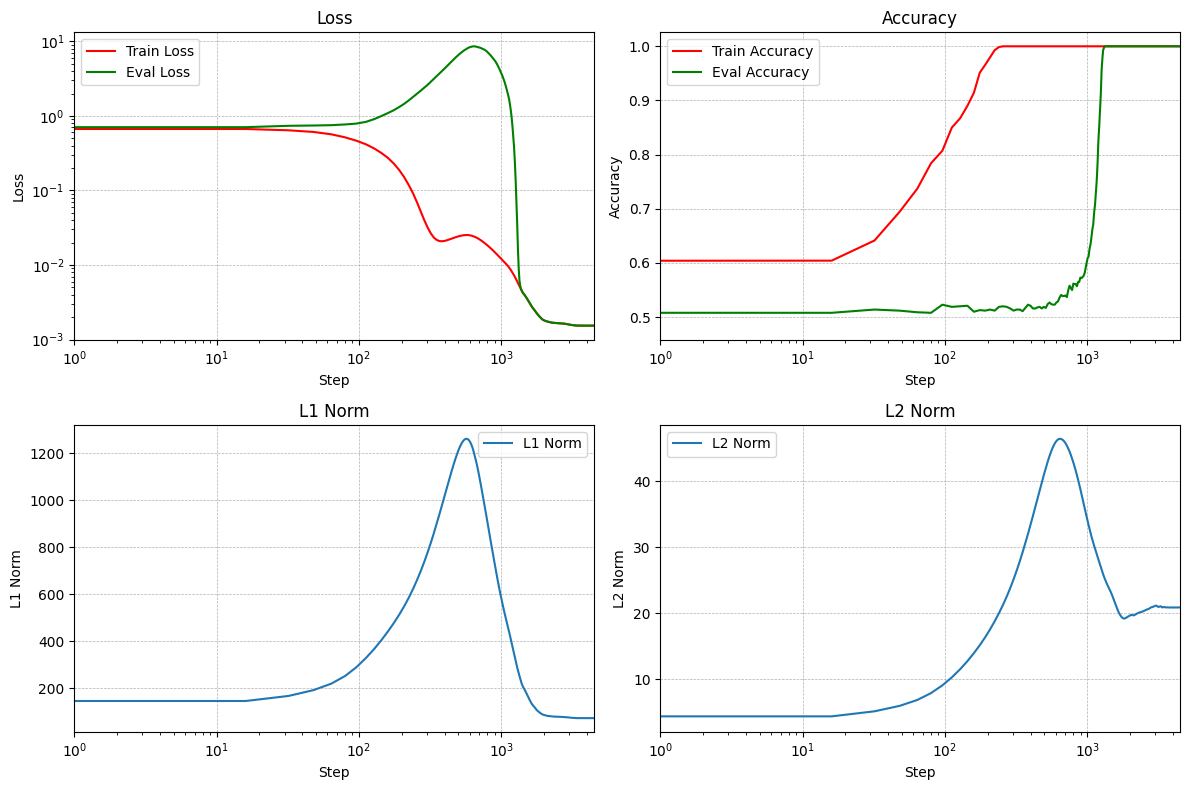

In [ ]:
# 訓練の可視化
def plot_training(all_metrics):
    steps = [m['step'] for m in all_metrics]

    plt.figure(figsize=(12, 8))

    # Loss
    plt.subplot(2, 2, 1)
    train_loss = [m['train_loss'] for m in all_metrics]
    eval_loss = [m['eval_loss'] for m in all_metrics]
    plt.semilogx(steps, train_loss, label='Train Loss', color='red')
    plt.semilogx(steps, eval_loss, label='Eval Loss', color='green')
    plt.yscale('log')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # Accuracy (Train and Eval)
    plt.subplot(2, 2, 2)
    train_acc = [m['train_acc'] for m in all_metrics]
    eval_acc = [m['eval_acc'] for m in all_metrics]
    plt.semilogx(steps, train_acc, label='Train Accuracy', color='red')
    plt.semilogx(steps, eval_acc, label='Eval Accuracy', color='green')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L1 Norm
    plt.subplot(2, 2, 3)
    l1_norm = [m['l1_norm'] for m in all_metrics]
    plt.semilogx(steps, l1_norm, label='L1 Norm')
    plt.xlabel('Step')
    plt.ylabel('L1 Norm')
    plt.legend()
    plt.title('L1 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L2 Norm
    plt.subplot(2, 2, 4)
    l2_norm = [m['l2_norm'] for m in all_metrics]
    plt.semilogx(steps, l2_norm, label='L2 Norm')
    plt.xlabel('Step')
    plt.ylabel('L2 Norm')
    plt.legend()
    plt.title('L2 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    plt.tight_layout()
    plt.savefig("grokking_parity.svg")
    plt.show()

plot_training(all_metrics)

# モデルを少し変更．幅を使ってスケーリング＋初期化時の分散を導入

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

hyper = {
    'n': 30,
    'k': 3,
    'train_size': 200,
    'test_size':300,
    'hidden_size': int(100),
    'sigma_init': 1.5,
    'loss_fn': 'cross_entropy',  # cross_entropy, hinge
    'optimizer': 'adam',         # sgd, adam, admw, vanilla_gd
    'regularization': 'l1',      # l1, l2. 正則化を行わない場合は 'none'
    'weight_decay': 2e-05,       # Weight decay を行わない場合は 0
    'learning_rate': 0.006,
    'warm_up_steps': 1,
    'b1': .99,
    'b2': .98,
    'log_every': 16,
    'save_every': 1,
    'max_steps': 15000,
    'seed': 5,
    'checkpoint_dir': 'checkpoints',
}

np.random.seed(hyper['seed'])

# 訓練データとテストデータを合わせたサンプル数を設定
total_size = hyper['train_size'] + hyper['test_size']

unique_binary_strings = set()

# 十分な数集まるまで繰り返す
while len(unique_binary_strings) < total_size:
    binary_string = tuple(np.random.randint(2, size=hyper['n']))
    unique_binary_strings.add(binary_string)

# NumPy 配列に変換
inputs = np.array(list(unique_binary_strings), dtype=np.float32)

# 出力ラベルを計算
outputs = np.sum(inputs[:, :hyper['k']], axis=-1) % 2
ones_column = np.ones((inputs.shape[0], 1), dtype=np.float32)
inputs = np.concatenate((inputs, ones_column), axis=1)

# データのインデックスをランダムに並べ替えてデータシャッフル
indices = np.random.permutation(len(inputs))
split_idx = int(hyper['train_size'])

# 訓練データとテストデータを分割
train_batch = (torch.tensor(inputs[indices[:split_idx]]).to(device), torch.tensor(outputs[indices[:split_idx]]).to(device))
eval_batch = (torch.tensor(inputs[indices[split_idx:]]).to(device), torch.tensor(outputs[indices[split_idx:]]).to(device))

import torch.nn.init as init

# モデル定義
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, sigma_init):
        super(Net, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size, bias=False)
        self.out = nn.Linear(hidden_size, 1, bias=False)
        self.relu = nn.ReLU()

        # 重みの初期化
        init.normal_(self.hidden.weight, mean=0.0, std=sigma_init)
        init.normal_(self.out.weight, mean=0.0, std=sigma_init)

    def forward(self, x):
        # 隠れ層のスケーリング
        x = self.hidden(x) / torch.sqrt(torch.tensor(self.hidden.weight.size(1), dtype=torch.float32))
        x = self.relu(x)

        # 出力層のスケーリング
        x = self.out(x) / torch.sqrt(torch.tensor(self.out.weight.size(1), dtype=torch.float32))

        return x.squeeze()

model = Net(hyper['n'] + 1, hyper['hidden_size'], hyper['sigma_init']).to(device)

# 損失関数の設定
if hyper['loss_fn'] == 'cross_entropy':
    loss_fn = nn.BCEWithLogitsLoss()
elif hyper['loss_fn'] == 'hinge':
    loss_fn = nn.HingeEmbeddingLoss()

# オプティマイザの設定
if hyper['optimizer'] == 'sgd':
    optimizer = optim.SGD(model.parameters(), lr=hyper['learning_rate'])
elif hyper['optimizer'] == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=hyper['learning_rate'], betas=(hyper['b1'], hyper['b2']))
elif hyper['optimizer'] == 'adamw':
    optimizer = optim.AdamW(model.parameters(), lr=hyper['learning_rate'], weight_decay=hyper['weight_decay'])
elif hyper['optimizer'] == 'vanilla_gd':
    # vanilla_GD の場合は手動で勾配降下を行う
    pass

# L1正則化の関数
def l1_regularization(model, weight_decay):
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    return weight_decay * l1_norm

# L2正則化の関数
def l2_regularization(model, weight_decay):
    l2_norm = sum(param.pow(2.0).sum() for param in model.parameters())
    return weight_decay * l2_norm

# トレーニング関数
def train_step(batch):
    model.train()
    optimizer.zero_grad() if hyper['optimizer'] != 'vanilla_gd' else None
    inputs, targets = batch
    outputs = model(inputs)
    loss = loss_fn(outputs, targets.float())

    # 正則化の追加
    if hyper['regularization'] == 'l1':
        loss += l1_regularization(model, hyper['weight_decay'])
    elif hyper['regularization'] == 'l2':
        loss += l2_regularization(model, hyper['weight_decay'])

    loss.backward()

    if hyper['optimizer'] == 'vanilla_gd':
        with torch.no_grad():
            for param in model.parameters():
                # 勾配に正則化のペナルティを加え，パラメータを更新
                if hyper['regularization'] == 'l1':
                    param.grad += hyper['weight_decay'] * torch.sign(param)
                elif hyper['regularization'] == 'l2':
                    param.grad += hyper['weight_decay'] * param
                param -= hyper['learning_rate'] * param.grad
    else:
        optimizer.step()

    preds = torch.sigmoid(outputs) > 0.5
    accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# 評価関数
def eval_step(batch):
    model.eval()
    inputs, targets = batch
    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, targets.float())

        # 正則化の追加
        if hyper['regularization'] == 'l1':
            loss += l1_regularization(model, hyper['weight_decay'])
        elif hyper['regularization'] == 'l2':
            loss += l2_regularization(model, hyper['weight_decay'])

        preds = torch.sigmoid(outputs) > 0.5
        accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# チェックポイントのディレクトリを作成
if not os.path.exists(hyper['checkpoint_dir']):
    os.makedirs(hyper['checkpoint_dir'])

# トレーニングと評価の記録用
all_metrics = []
saved_checkpoints = []

# トレーニングループ
for step in range(hyper['max_steps']):
    train_loss, train_acc = train_step(train_batch)

    if step % hyper['log_every'] == 0:
        eval_loss, eval_acc = eval_step(eval_batch)
        l1_norm = sum(param.abs().sum().item() for param in model.parameters())
        l2_norm = np.sqrt(sum(param.pow(2.0).sum().item() for param in model.parameters()))
        metrics = {
            'step': step,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'eval_loss': eval_loss,
            'eval_acc': eval_acc,
            'l1_norm': l1_norm,
            'l2_norm': l2_norm
        }
        all_metrics.append(metrics)

        # ログメッセージの表示
        print(f"Step {step}/{hyper['max_steps']}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Eval Loss = {eval_loss:.4f}, Eval Acc = {eval_acc:.4f}")

    if step % hyper['save_every'] == 0:
        checkpoint_path = os.path.join(hyper['checkpoint_dir'], f'checkpoint_step_{step}.pt')
        torch.save({'step': step, 'state_dict': model.state_dict()}, checkpoint_path)
        saved_checkpoints.append(checkpoint_path)

Using device: cuda
Step 0/15000: Train Loss = 1.0488, Train Acc = 0.4900, Eval Loss = 1.0297, Eval Acc = 0.5000
Step 16/15000: Train Loss = 0.8641, Train Acc = 0.5050, Eval Loss = 0.9024, Eval Acc = 0.4900
Step 32/15000: Train Loss = 0.7998, Train Acc = 0.5550, Eval Loss = 0.8622, Eval Acc = 0.4833
Step 48/15000: Train Loss = 0.7607, Train Acc = 0.5600, Eval Loss = 0.8639, Eval Acc = 0.4600
Step 64/15000: Train Loss = 0.7402, Train Acc = 0.5950, Eval Loss = 0.8732, Eval Acc = 0.4767
Step 80/15000: Train Loss = 0.6875, Train Acc = 0.6400, Eval Loss = 0.8511, Eval Acc = 0.4667
Step 96/15000: Train Loss = 0.6816, Train Acc = 0.6800, Eval Loss = 0.8750, Eval Acc = 0.4800
Step 112/15000: Train Loss = 0.6569, Train Acc = 0.7050, Eval Loss = 0.8773, Eval Acc = 0.4967
Step 128/15000: Train Loss = 0.6287, Train Acc = 0.7200, Eval Loss = 0.8792, Eval Acc = 0.4900
Step 144/15000: Train Loss = 0.6245, Train Acc = 0.7050, Eval Loss = 0.9039, Eval Acc = 0.4967
Step 160/15000: Train Loss = 0.6005, Tr

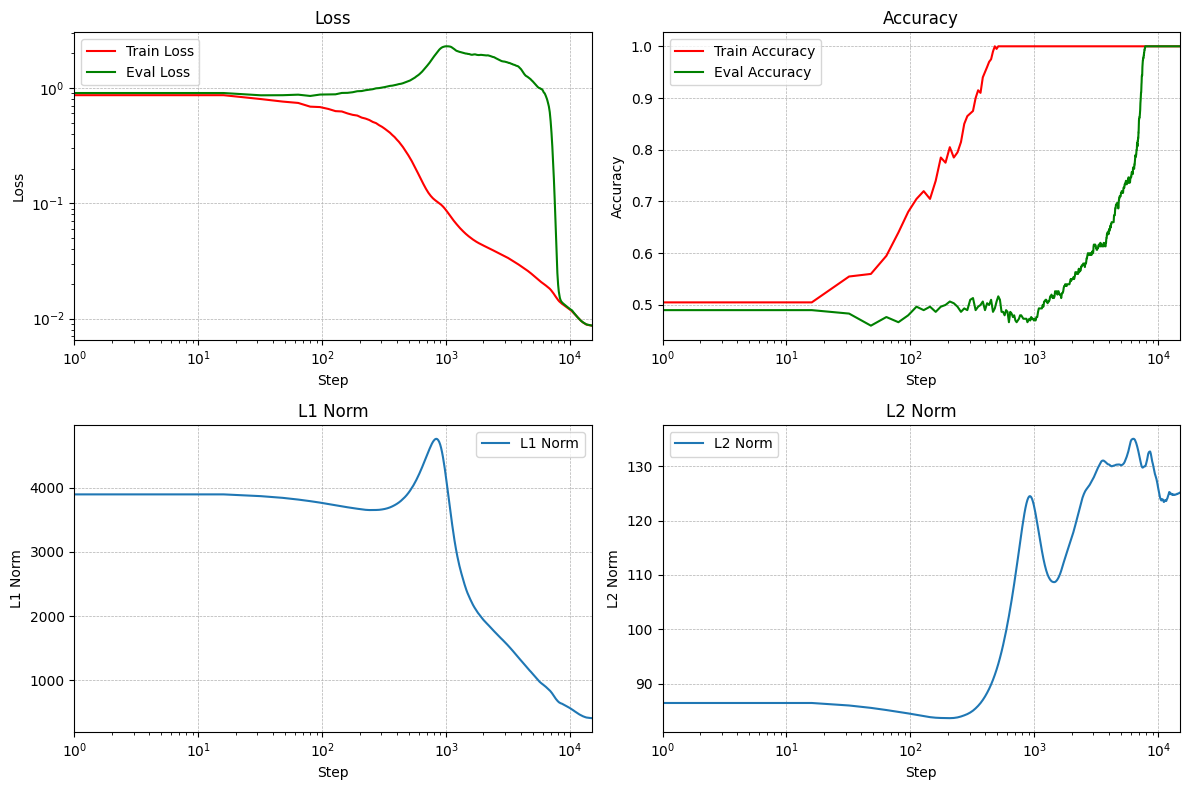

In [107]:
# 訓練の可視化
def plot_training(all_metrics):
    steps = [m['step'] for m in all_metrics]

    plt.figure(figsize=(12, 8))

    # Loss
    plt.subplot(2, 2, 1)
    train_loss = [m['train_loss'] for m in all_metrics]
    eval_loss = [m['eval_loss'] for m in all_metrics]
    plt.semilogx(steps, train_loss, label='Train Loss', color='red')
    plt.semilogx(steps, eval_loss, label='Eval Loss', color='green')
    plt.yscale('log')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # Accuracy (Train and Eval)
    plt.subplot(2, 2, 2)
    train_acc = [m['train_acc'] for m in all_metrics]
    eval_acc = [m['eval_acc'] for m in all_metrics]
    plt.semilogx(steps, train_acc, label='Train Accuracy', color='red')
    plt.semilogx(steps, eval_acc, label='Eval Accuracy', color='green')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L1 Norm
    plt.subplot(2, 2, 3)
    l1_norm = [m['l1_norm'] for m in all_metrics]
    plt.semilogx(steps, l1_norm, label='L1 Norm')
    plt.xlabel('Step')
    plt.ylabel('L1 Norm')
    plt.legend()
    plt.title('L1 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L2 Norm
    plt.subplot(2, 2, 4)
    l2_norm = [m['l2_norm'] for m in all_metrics]
    plt.semilogx(steps, l2_norm, label='L2 Norm')
    plt.xlabel('Step')
    plt.ylabel('L2 Norm')
    plt.legend()
    plt.title('L2 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    plt.tight_layout()
    plt.savefig("grokking_parity.svg")
    plt.show()

plot_training(all_metrics)

Visualizing weights from checkpoint checkpoints/checkpoint_step_1.pt


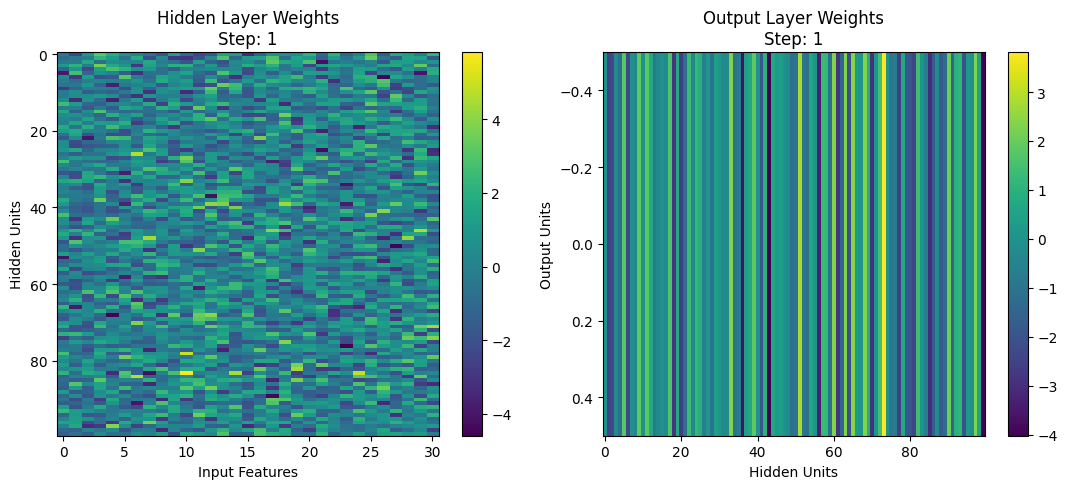

Visualizing weights from checkpoint checkpoints/checkpoint_step_14999.pt


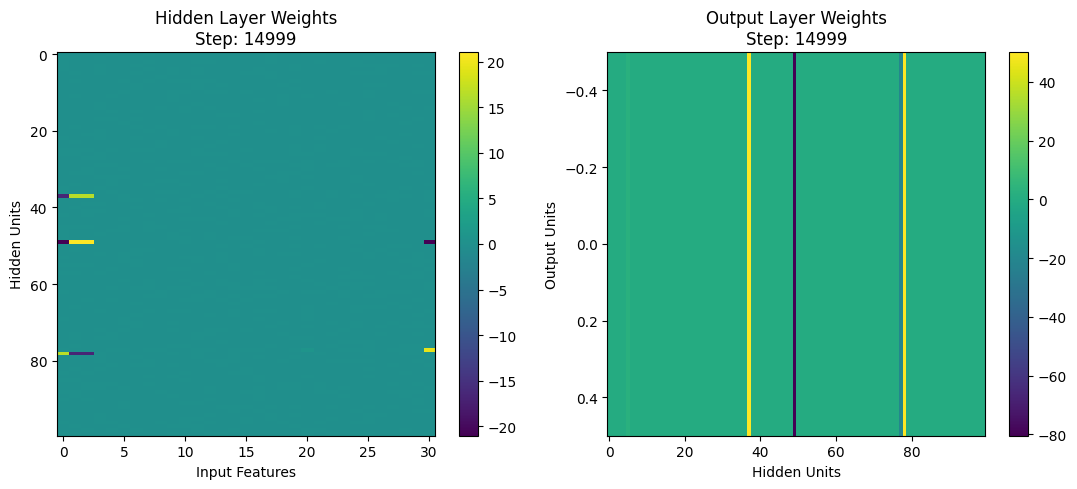

In [108]:
# モデルの重みの可視化
def visualize_weights(model, state_dict=None, step=None):
    if state_dict is not None:
        model.load_state_dict(state_dict)

    with torch.no_grad():
        hidden_weights = model.hidden.weight.cpu().numpy()
        output_weights = model.out.weight.cpu().numpy()

        plt.figure(figsize=(11, 5))

        # Hidden layer weights
        plt.subplot(1, 2, 1)
        plt.imshow(hidden_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Hidden Layer Weights\nStep: {step}' if step is not None else 'Hidden Layer Weights')
        plt.xlabel('Input Features')
        plt.ylabel('Hidden Units')

        # Output layer weights
        plt.subplot(1, 2, 2)
        plt.imshow(output_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Output Layer Weights\nStep: {step}' if step is not None else 'Output Layer Weights')
        plt.xlabel('Hidden Units')
        plt.ylabel('Output Units')
        plt.tight_layout()

        plt.show()

# 特定の時刻の重みを可視化
def visualize_checkpoint_weights(checkpoint_step):
    # チェックポイントのファイルパスを検索
    checkpoint_path = next((p for p in saved_checkpoints if f'checkpoint_step_{checkpoint_step}.pt' in p), None)
    if checkpoint_path is not None:
        print(f"Visualizing weights from checkpoint {checkpoint_path}")
        # checkpoint = torch.load(checkpoint_path)
        checkpoint = torch.load(checkpoint_path, weights_only=True)
        visualize_weights(model, state_dict=checkpoint['state_dict'], step=checkpoint_step)
    else:
        print(f"No checkpoint found for step {checkpoint_step}")

# 最終ステップのチェックポイントを視覚化する関数
def visualize_final_checkpoint_weights():
    # 最終ステップのチェックポイントファイルを見つける
    if not saved_checkpoints:
        print("No checkpoints found.")
        return

    final_checkpoint_step = max(int(p.split('_')[-1].split('.')[0]) for p in saved_checkpoints)
    visualize_checkpoint_weights(final_checkpoint_step)

visualize_checkpoint_weights(1)
visualize_final_checkpoint_weights()

# Hidden Layer Weights の最初の3列の変化を Hidden Units ごとに表示

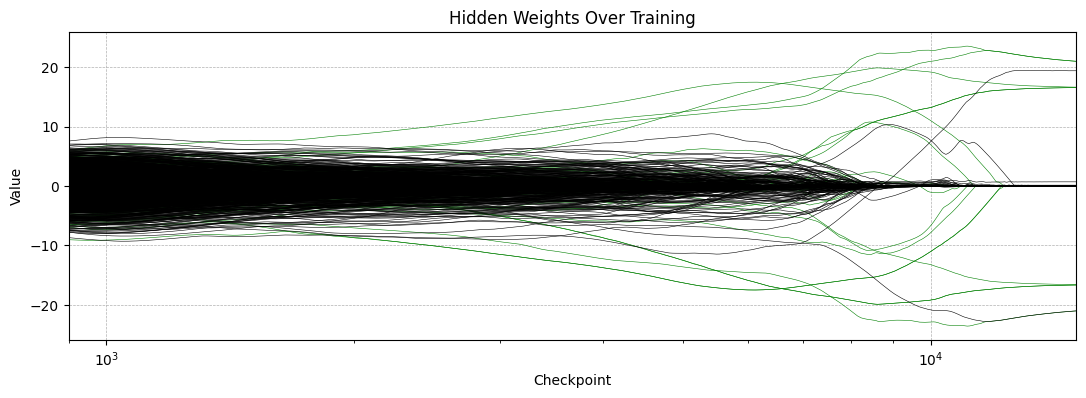

In [109]:
# 隠れ層の重みをチェックポイントから抽出する関数
def extract_hidden_weights(saved_checkpoints):
    """
    Parameters:
    - saved_checkpoints (list of str): チェックポイントファイルのパスのリスト

    Returns:
    - np.ndarray: 抽出した隠れ層の重みを含む3DのNumPy配列
    """
    hidden_weights = []  # 隠れ層の重みを保存するリスト
    for checkpoint_path in saved_checkpoints:
        # チェックポイントファイルをロード
        # checkpoint = torch.load(checkpoint_path)
        checkpoint = torch.load(checkpoint_path, weights_only=True)
        # モデルの状態辞書から隠れ層の重みを取得し，NumPy配列に変換
        weight = checkpoint['state_dict']['hidden.weight'].cpu().numpy()
        # 重みをリストに追加
        hidden_weights.append(weight)

    # リストをNumPy配列に変換．形状は (チェックポイント数, 隠れ層のユニット数, 入力次元数)
    return np.array(hidden_weights)

# 隠れ層の重みをプロットする関数
def plot_weight_checkpoints(hidden_weights):
    """
    Parameters:
    - hidden_weights (np.ndarray): 隠れ層の重みを含む3DのNumPy配列
    """
    fig, ax = plt.subplots(figsize=(13, 4))
    checkpoints, rows, cols = hidden_weights.shape  # 形状を取得

    # 隠れ層のユニットごとにプロット
    for col in range(cols):  # colでループ. plotly では転置される (???) からこれで OK (???)
        for row in range(rows):
            # 各ユニットの重みの値をチェックポイントごとに取得
            y_values = hidden_weights[:, row, col]
            # ユニットの位置に基づいて色を決定（最初の3列は緑，それ以外は黒）
            color = 'g' if col < 3 else 'k'
            ax.plot(y_values, color=color, alpha=1.0, linewidth=0.4)

    ax.set_title("Hidden Weights Over Training")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("Value")
    ax.set_xscale('log')
    ax.set_xlim(900, checkpoints)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

# チェックポイントから隠れ層の重みを抽出してプロット
hidden_weights = extract_hidden_weights(saved_checkpoints)
plot_weight_checkpoints(hidden_weights)

# 緑色で表示されているもの（確認用）

In [ ]:
# チェックポイントインデックスを指定
checkpoint_index = 1200

# チェックポイントインデックスが有効か確認
if checkpoint_index < hidden_weights.shape[0]:
    # 指定されたチェックポイントの重みを取得
    checkpoint_weights = hidden_weights[checkpoint_index]

    # 色の定義
    green = '\033[92m'  # 緑色
    black = '\033[0m'   # 黒色（デフォルト）

    # 各行ごとに値を表示
    for row in range(checkpoint_weights.shape[0]):
        for col in range(checkpoint_weights.shape[1]):
            # 列に基づいて色を選択
            color = green if col < 3 else black
            value = checkpoint_weights[row, col]
            print(f"{color}Checkpoint {checkpoint_index}, Unit {row}, Input Dimension {col}: {value}{black}")
else:
    print("Invalid checkpoint index")

Checkpoint 1200, Unit 0, Input Dimension 0: -0.017205899581313133
Checkpoint 1200, Unit 0, Input Dimension 1: 0.014567005448043346
Checkpoint 1200, Unit 0, Input Dimension 2: 0.008119254373013973
Checkpoint 1200, Unit 0, Input Dimension 3: -0.02140958048403263
Checkpoint 1200, Unit 0, Input Dimension 4: -0.0012328587472438812
Checkpoint 1200, Unit 0, Input Dimension 5: 0.004186025820672512
Checkpoint 1200, Unit 0, Input Dimension 6: 0.025680474936962128
Checkpoint 1200, Unit 0, Input Dimension 7: 0.03094707429409027
Checkpoint 1200, Unit 0, Input Dimension 8: 0.03421300649642944
Checkpoint 1200, Unit 0, Input Dimension 9: 0.0015627326210960746
Checkpoint 1200, Unit 0, Input Dimension 10: -0.07729092240333557
Checkpoint 1200, Unit 0, Input Dimension 11: -0.004064284265041351
Checkpoint 1200, Unit 0, Input Dimension 12: -0.022412125021219254
Checkpoint 1200, Unit 0, Input Dimension 13: 0.01866382546722889
Checkpoint 1200, Unit 0, Input Dimension 14: -0.13512150943279266
Checkpoint 1200, 

# オプティマイザ―なし

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
import time

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

hyper = {
    'n': 30,
    'k': 3,
    'train_size': 700,
    'test_size': 1000,
    'hidden_size': int(50),
    'loss_fn': 'cross_entropy',  # cross_entropy, hinge
    'optimizer': 'vanilla_gd',         # sgd, adam, admw, vanilla_gd
    'regularization': 'l1',      # l1, l2. 正則化を行わない場合は 'none'
    'weight_decay': 2e-05,       # Weight decay を行わない場合は 0
    'learning_rate': 0.006,
    'warm_up_steps': 1,
    'b1': .99,
    'b2': .98,
    'log_every': 16,
    'save_every': 1,
    'max_steps': 100000,
    'seed': 5,
    'checkpoint_dir': 'checkpoints',
}

np.random.seed(hyper['seed'])

# 訓練データとテストデータを合わせたサンプル数を設定
total_size = hyper['train_size'] + hyper['test_size']

unique_binary_strings = set()

# 十分な数集まるまで繰り返す
while len(unique_binary_strings) < total_size:
    binary_string = tuple(np.random.randint(2, size=hyper['n']))
    unique_binary_strings.add(binary_string)

# NumPy 配列に変換
inputs = np.array(list(unique_binary_strings), dtype=np.float32)

# 出力ラベルを計算
outputs = np.sum(inputs[:, :hyper['k']], axis=-1) % 2
ones_column = np.ones((inputs.shape[0], 1), dtype=np.float32)
inputs = np.concatenate((inputs, ones_column), axis=1)

# データのインデックスをランダムに並べ替えてデータシャッフル
indices = np.random.permutation(len(inputs))
split_idx = int(hyper['train_size'])

# 訓練データとテストデータを分割
train_batch = (torch.tensor(inputs[indices[:split_idx]]).to(device), torch.tensor(outputs[indices[:split_idx]]).to(device))
eval_batch = (torch.tensor(inputs[indices[split_idx:]]).to(device), torch.tensor(outputs[indices[split_idx:]]).to(device))

# モデル定義
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(hyper['n'] + 1, hidden_size, bias=False)
        self.out = nn.Linear(hidden_size, 1, bias=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        return self.out(x).squeeze()

model = Net(hyper['hidden_size']).to(device)

# 損失関数の設定
if hyper['loss_fn'] == 'cross_entropy':
    loss_fn = nn.BCEWithLogitsLoss()
elif hyper['loss_fn'] == 'hinge':
    loss_fn = nn.HingeEmbeddingLoss()

# オプティマイザの設定
if hyper['optimizer'] == 'sgd':
    optimizer = optim.SGD(model.parameters(), lr=hyper['learning_rate'])
elif hyper['optimizer'] == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=hyper['learning_rate'], betas=(hyper['b1'], hyper['b2']))
elif hyper['optimizer'] == 'adamw':
    optimizer = optim.AdamW(model.parameters(), lr=hyper['learning_rate'], weight_decay=hyper['weight_decay'])
elif hyper['optimizer'] == 'vanilla_gd':
    # vanilla_GD の場合は手動で勾配降下を行う
    pass

# L1正則化の関数
def l1_regularization(model, weight_decay):
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    return weight_decay * l1_norm

# L2正則化の関数
def l2_regularization(model, weight_decay):
    l2_norm = sum(param.pow(2.0).sum() for param in model.parameters())
    return weight_decay * l2_norm

# トレーニング関数
def train_step(batch):
    model.train()
    optimizer.zero_grad() if hyper['optimizer'] != 'vanilla_gd' else None
    inputs, targets = batch
    outputs = model(inputs)
    loss = loss_fn(outputs, targets.float())

    # 正則化の追加
    if hyper['regularization'] == 'l1':
        loss += l1_regularization(model, hyper['weight_decay'])
    elif hyper['regularization'] == 'l2':
        loss += l2_regularization(model, hyper['weight_decay'])

    loss.backward()

    if hyper['optimizer'] == 'vanilla_gd':
        with torch.no_grad():
            for param in model.parameters():
                # 勾配に正則化のペナルティを加え，パラメータを更新
                if hyper['regularization'] == 'l1':
                    param.grad += hyper['weight_decay'] * torch.sign(param)
                elif hyper['regularization'] == 'l2':
                    param.grad += hyper['weight_decay'] * param
                param -= hyper['learning_rate'] * param.grad
    else:
        optimizer.step()

    preds = torch.sigmoid(outputs) > 0.5
    accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# 評価関数
def eval_step(batch):
    model.eval()
    inputs, targets = batch
    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, targets.float())

        # 正則化の追加
        if hyper['regularization'] == 'l1':
            loss += l1_regularization(model, hyper['weight_decay'])
        elif hyper['regularization'] == 'l2':
            loss += l2_regularization(model, hyper['weight_decay'])

        preds = torch.sigmoid(outputs) > 0.5
        accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# チェックポイントのディレクトリを作成
if not os.path.exists(hyper['checkpoint_dir']):
    os.makedirs(hyper['checkpoint_dir'])

# トレーニングと評価の記録用
all_metrics = []
saved_checkpoints = []

# トレーニングループ
for step in range(hyper['max_steps']):
    train_loss, train_acc = train_step(train_batch)

    if step % hyper['log_every'] == 0:
        eval_loss, eval_acc = eval_step(eval_batch)
        l1_norm = sum(param.abs().sum().item() for param in model.parameters())
        l2_norm = np.sqrt(sum(param.pow(2.0).sum().item() for param in model.parameters()))
        metrics = {
            'step': step,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'eval_loss': eval_loss,
            'eval_acc': eval_acc,
            'l1_norm': l1_norm,
            'l2_norm': l2_norm
        }
        all_metrics.append(metrics)

        # ログメッセージの表示
        print(f"Step {step}/{hyper['max_steps']}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Eval Loss = {eval_loss:.4f}, Eval Acc = {eval_acc:.4f}")

    if step % hyper['save_every'] == 0:
        checkpoint_path = os.path.join(hyper['checkpoint_dir'], f'checkpoint_step_{step}.pt')
        torch.save({'step': step, 'state_dict': model.state_dict()}, checkpoint_path)
        saved_checkpoints.append(checkpoint_path)

ストリーミング出力は最後の 5000 行に切り捨てられました。
Step 20000/100000: Train Loss = 0.2429, Train Acc = 1.0000, Eval Loss = 306.0195, Eval Acc = 0.9120
Step 20016/100000: Train Loss = 0.2429, Train Acc = 1.0000, Eval Loss = 305.8463, Eval Acc = 0.9120
Step 20032/100000: Train Loss = 0.2429, Train Acc = 1.0000, Eval Loss = 305.5969, Eval Acc = 0.9110
Step 20048/100000: Train Loss = 0.2429, Train Acc = 1.0000, Eval Loss = 305.3654, Eval Acc = 0.9110
Step 20064/100000: Train Loss = 0.2429, Train Acc = 1.0000, Eval Loss = 305.1375, Eval Acc = 0.9110
Step 20080/100000: Train Loss = 0.2430, Train Acc = 1.0000, Eval Loss = 304.9115, Eval Acc = 0.9110
Step 20096/100000: Train Loss = 0.2430, Train Acc = 1.0000, Eval Loss = 304.7136, Eval Acc = 0.9120
Step 20112/100000: Train Loss = 0.2430, Train Acc = 1.0000, Eval Loss = 304.5170, Eval Acc = 0.9120
Step 20128/100000: Train Loss = 0.2430, Train Acc = 1.0000, Eval Loss = 304.3223, Eval Acc = 0.9120
Step 20144/100000: Train Loss = 0.2430, Train Acc = 1.0000, Eval Los

- 2段階上昇している...?
- ノルムの減少を伴わない汎化が起きている

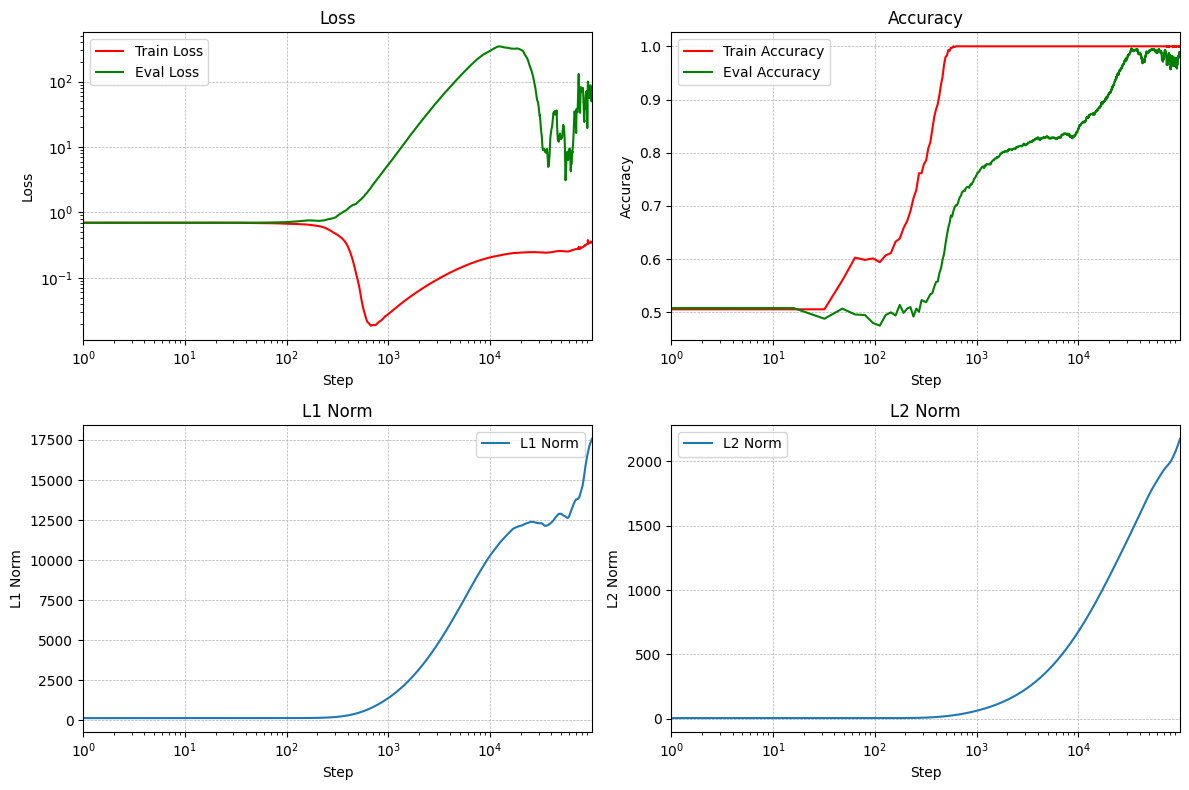

In [ ]:
# 訓練の可視化
def plot_training(all_metrics):
    steps = [m['step'] for m in all_metrics]

    plt.figure(figsize=(12, 8))

    # Loss
    plt.subplot(2, 2, 1)
    train_loss = [m['train_loss'] for m in all_metrics]
    eval_loss = [m['eval_loss'] for m in all_metrics]
    plt.semilogx(steps, train_loss, label='Train Loss', color='red')
    plt.semilogx(steps, eval_loss, label='Eval Loss', color='green')
    plt.yscale('log')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # Accuracy (Train and Eval)
    plt.subplot(2, 2, 2)
    train_acc = [m['train_acc'] for m in all_metrics]
    eval_acc = [m['eval_acc'] for m in all_metrics]
    plt.semilogx(steps, train_acc, label='Train Accuracy', color='red')
    plt.semilogx(steps, eval_acc, label='Eval Accuracy', color='green')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L1 Norm
    plt.subplot(2, 2, 3)
    l1_norm = [m['l1_norm'] for m in all_metrics]
    plt.semilogx(steps, l1_norm, label='L1 Norm')
    plt.xlabel('Step')
    plt.ylabel('L1 Norm')
    plt.legend()
    plt.title('L1 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L2 Norm
    plt.subplot(2, 2, 4)
    l2_norm = [m['l2_norm'] for m in all_metrics]
    plt.semilogx(steps, l2_norm, label='L2 Norm')
    plt.xlabel('Step')
    plt.ylabel('L2 Norm')
    plt.legend()
    plt.title('L2 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    plt.tight_layout()
    plt.show()

plot_training(all_metrics)

Visualizing weights from checkpoint checkpoints/checkpoint_step_99999.pt


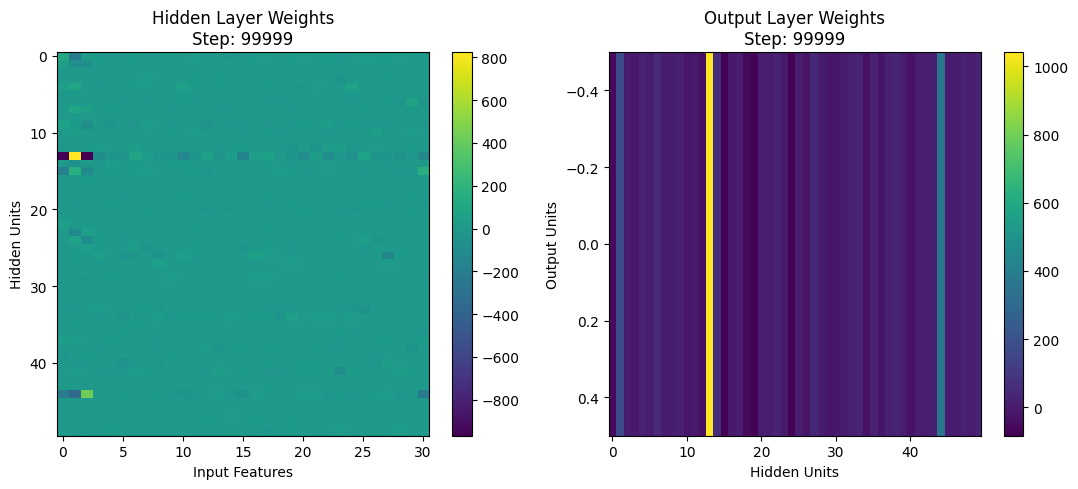

In [ ]:
# モデルの重みの可視化
def visualize_weights(model, state_dict=None, step=None):
    if state_dict is not None:
        model.load_state_dict(state_dict)

    with torch.no_grad():
        hidden_weights = model.hidden.weight.cpu().numpy()
        output_weights = model.out.weight.cpu().numpy()

        plt.figure(figsize=(11, 5))

        # Hidden layer weights
        plt.subplot(1, 2, 1)
        plt.imshow(hidden_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Hidden Layer Weights\nStep: {step}' if step is not None else 'Hidden Layer Weights')
        plt.xlabel('Input Features')
        plt.ylabel('Hidden Units')

        # Output layer weights
        plt.subplot(1, 2, 2)
        plt.imshow(output_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Output Layer Weights\nStep: {step}' if step is not None else 'Output Layer Weights')
        plt.xlabel('Hidden Units')
        plt.ylabel('Output Units')

        plt.tight_layout()
        plt.show()

# 特定の時刻の重みを可視化
def visualize_checkpoint_weights(checkpoint_step):
    # チェックポイントのファイルパスを検索
    checkpoint_path = next((p for p in saved_checkpoints if f'checkpoint_step_{checkpoint_step}.pt' in p), None)
    if checkpoint_path is not None:
        print(f"Visualizing weights from checkpoint {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path)
        visualize_weights(model, state_dict=checkpoint['state_dict'], step=checkpoint_step)
    else:
        print(f"No checkpoint found for step {checkpoint_step}")

# 最終ステップのチェックポイントを視覚化する関数
def visualize_final_checkpoint_weights():
    # 最終ステップのチェックポイントファイルを見つける
    if not saved_checkpoints:
        print("No checkpoints found.")
        return

    final_checkpoint_step = max(int(p.split('_')[-1].split('.')[0]) for p in saved_checkpoints)
    visualize_checkpoint_weights(final_checkpoint_step)

visualize_checkpoint_weights(1)
visualize_final_checkpoint_weights()

# 中間層の幅を 1000 に

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
import time

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

hyper = {
    'n': 30,
    'k': 3,
    'train_size': 700,
    'test_size': 1000,
    'hidden_size': int(1000),
    'loss_fn': 'cross_entropy',  # cross_entropy, hinge
    'optimizer': 'vanilla_gd',         # sgd, adam, admw, vanilla_gd
    'regularization': 'l1',      # l1, l2. 正則化を行わない場合は 'none'
    'weight_decay': 2e-05,       # Weight decay を行わない場合は 0
    'learning_rate': 0.006,
    'warm_up_steps': 1,
    'b1': .99,
    'b2': .98,
    'log_every': 16,
    'save_every': 1,
    'max_steps': 100000,
    'seed': 5,
    'checkpoint_dir': 'checkpoints',
}

np.random.seed(hyper['seed'])

# 訓練データとテストデータを合わせたサンプル数を設定
total_size = hyper['train_size'] + hyper['test_size']

unique_binary_strings = set()

# 十分な数集まるまで繰り返す
while len(unique_binary_strings) < total_size:
    binary_string = tuple(np.random.randint(2, size=hyper['n']))
    unique_binary_strings.add(binary_string)

# NumPy 配列に変換
inputs = np.array(list(unique_binary_strings), dtype=np.float32)

# 出力ラベルを計算
outputs = np.sum(inputs[:, :hyper['k']], axis=-1) % 2
ones_column = np.ones((inputs.shape[0], 1), dtype=np.float32)
inputs = np.concatenate((inputs, ones_column), axis=1)

# データのインデックスをランダムに並べ替えてデータシャッフル
indices = np.random.permutation(len(inputs))
split_idx = int(hyper['train_size'])

# 訓練データとテストデータを分割
train_batch = (torch.tensor(inputs[indices[:split_idx]]).to(device), torch.tensor(outputs[indices[:split_idx]]).to(device))
eval_batch = (torch.tensor(inputs[indices[split_idx:]]).to(device), torch.tensor(outputs[indices[split_idx:]]).to(device))

# モデル定義
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(hyper['n'] + 1, hidden_size, bias=False)
        self.out = nn.Linear(hidden_size, 1, bias=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        return self.out(x).squeeze()

model = Net(hyper['hidden_size']).to(device)

# 損失関数の設定
if hyper['loss_fn'] == 'cross_entropy':
    loss_fn = nn.BCEWithLogitsLoss()
elif hyper['loss_fn'] == 'hinge':
    loss_fn = nn.HingeEmbeddingLoss()

# オプティマイザの設定
if hyper['optimizer'] == 'sgd':
    optimizer = optim.SGD(model.parameters(), lr=hyper['learning_rate'])
elif hyper['optimizer'] == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=hyper['learning_rate'], betas=(hyper['b1'], hyper['b2']))
elif hyper['optimizer'] == 'adamw':
    optimizer = optim.AdamW(model.parameters(), lr=hyper['learning_rate'], weight_decay=hyper['weight_decay'])
elif hyper['optimizer'] == 'vanilla_gd':
    # vanilla_GD の場合は手動で勾配降下を行う
    pass

# L1正則化の関数
def l1_regularization(model, weight_decay):
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    return weight_decay * l1_norm

# L2正則化の関数
def l2_regularization(model, weight_decay):
    l2_norm = sum(param.pow(2.0).sum() for param in model.parameters())
    return weight_decay * l2_norm

# トレーニング関数
def train_step(batch):
    model.train()
    optimizer.zero_grad() if hyper['optimizer'] != 'vanilla_gd' else None
    inputs, targets = batch
    outputs = model(inputs)
    loss = loss_fn(outputs, targets.float())

    # 正則化の追加
    if hyper['regularization'] == 'l1':
        loss += l1_regularization(model, hyper['weight_decay'])
    elif hyper['regularization'] == 'l2':
        loss += l2_regularization(model, hyper['weight_decay'])

    loss.backward()

    if hyper['optimizer'] == 'vanilla_gd':
        with torch.no_grad():
            for param in model.parameters():
                # 勾配に正則化のペナルティを加え，パラメータを更新
                if hyper['regularization'] == 'l1':
                    param.grad += hyper['weight_decay'] * torch.sign(param)
                elif hyper['regularization'] == 'l2':
                    param.grad += hyper['weight_decay'] * param
                param -= hyper['learning_rate'] * param.grad
    else:
        optimizer.step()

    preds = torch.sigmoid(outputs) > 0.5
    accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# 評価関数
def eval_step(batch):
    model.eval()
    inputs, targets = batch
    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, targets.float())

        # 正則化の追加
        if hyper['regularization'] == 'l1':
            loss += l1_regularization(model, hyper['weight_decay'])
        elif hyper['regularization'] == 'l2':
            loss += l2_regularization(model, hyper['weight_decay'])

        preds = torch.sigmoid(outputs) > 0.5
        accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# チェックポイントのディレクトリを作成
if not os.path.exists(hyper['checkpoint_dir']):
    os.makedirs(hyper['checkpoint_dir'])

# トレーニングと評価の記録用
all_metrics = []
saved_checkpoints = []

# トレーニングループ
for step in range(hyper['max_steps']):
    train_loss, train_acc = train_step(train_batch)

    if step % hyper['log_every'] == 0:
        eval_loss, eval_acc = eval_step(eval_batch)
        l1_norm = sum(param.abs().sum().item() for param in model.parameters())
        l2_norm = np.sqrt(sum(param.pow(2.0).sum().item() for param in model.parameters()))
        metrics = {
            'step': step,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'eval_loss': eval_loss,
            'eval_acc': eval_acc,
            'l1_norm': l1_norm,
            'l2_norm': l2_norm
        }
        all_metrics.append(metrics)

        # ログメッセージの表示
        print(f"Step {step}/{hyper['max_steps']}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Eval Loss = {eval_loss:.4f}, Eval Acc = {eval_acc:.4f}")

    if step % hyper['save_every'] == 0:
        checkpoint_path = os.path.join(hyper['checkpoint_dir'], f'checkpoint_step_{step}.pt')
        torch.save({'step': step, 'state_dict': model.state_dict()}, checkpoint_path)
        saved_checkpoints.append(checkpoint_path)

ストリーミング出力は最後の 5000 行に切り捨てられました。
Step 20000/100000: Train Loss = 0.2896, Train Acc = 1.0000, Eval Loss = 22.2793, Eval Acc = 0.8960
Step 20016/100000: Train Loss = 0.2896, Train Acc = 1.0000, Eval Loss = 22.4438, Eval Acc = 0.8960
Step 20032/100000: Train Loss = 0.2895, Train Acc = 1.0000, Eval Loss = 22.6795, Eval Acc = 0.8950
Step 20048/100000: Train Loss = 0.2895, Train Acc = 1.0000, Eval Loss = 22.9400, Eval Acc = 0.8950
Step 20064/100000: Train Loss = 0.2894, Train Acc = 1.0000, Eval Loss = 23.2837, Eval Acc = 0.8940
Step 20080/100000: Train Loss = 0.2894, Train Acc = 1.0000, Eval Loss = 23.5238, Eval Acc = 0.8940
Step 20096/100000: Train Loss = 0.2894, Train Acc = 1.0000, Eval Loss = 23.8162, Eval Acc = 0.8930
Step 20112/100000: Train Loss = 0.2893, Train Acc = 1.0000, Eval Loss = 24.1314, Eval Acc = 0.8920
Step 20128/100000: Train Loss = 0.2893, Train Acc = 1.0000, Eval Loss = 24.4838, Eval Acc = 0.8930
Step 20144/100000: Train Loss = 0.2892, Train Acc = 1.0000, Eval Loss = 24.83

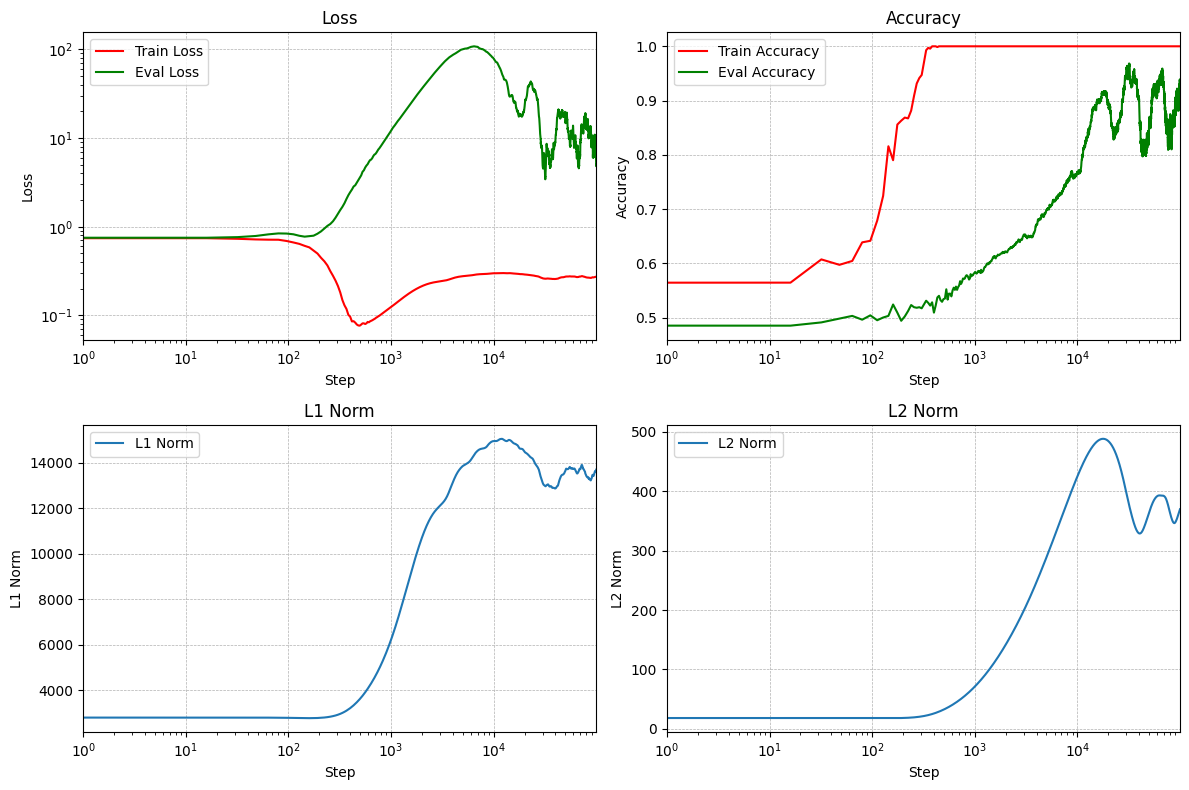

In [ ]:
# 訓練の可視化
def plot_training(all_metrics):
    steps = [m['step'] for m in all_metrics]

    plt.figure(figsize=(12, 8))

    # Loss
    plt.subplot(2, 2, 1)
    train_loss = [m['train_loss'] for m in all_metrics]
    eval_loss = [m['eval_loss'] for m in all_metrics]
    plt.semilogx(steps, train_loss, label='Train Loss', color='red')
    plt.semilogx(steps, eval_loss, label='Eval Loss', color='green')
    plt.yscale('log')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # Accuracy (Train and Eval)
    plt.subplot(2, 2, 2)
    train_acc = [m['train_acc'] for m in all_metrics]
    eval_acc = [m['eval_acc'] for m in all_metrics]
    plt.semilogx(steps, train_acc, label='Train Accuracy', color='red')
    plt.semilogx(steps, eval_acc, label='Eval Accuracy', color='green')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L1 Norm
    plt.subplot(2, 2, 3)
    l1_norm = [m['l1_norm'] for m in all_metrics]
    plt.semilogx(steps, l1_norm, label='L1 Norm')
    plt.xlabel('Step')
    plt.ylabel('L1 Norm')
    plt.legend()
    plt.title('L1 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L2 Norm
    plt.subplot(2, 2, 4)
    l2_norm = [m['l2_norm'] for m in all_metrics]
    plt.semilogx(steps, l2_norm, label='L2 Norm')
    plt.xlabel('Step')
    plt.ylabel('L2 Norm')
    plt.legend()
    plt.title('L2 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    plt.tight_layout()
    plt.show()

plot_training(all_metrics)

Visualizing weights from checkpoint checkpoints/checkpoint_step_99999.pt


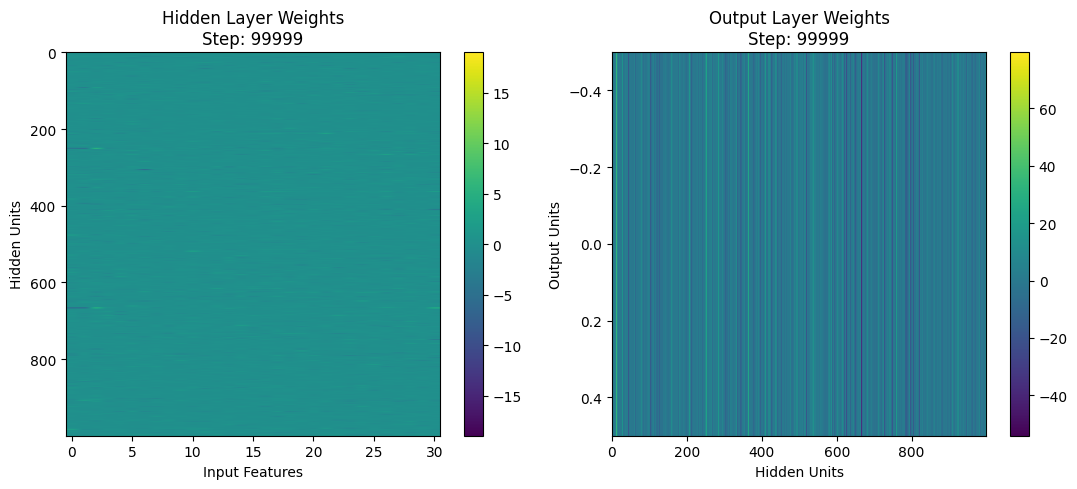

In [ ]:
# モデルの重みの可視化
def visualize_weights(model, state_dict=None, step=None):
    if state_dict is not None:
        model.load_state_dict(state_dict)

    with torch.no_grad():
        hidden_weights = model.hidden.weight.cpu().numpy()
        output_weights = model.out.weight.cpu().numpy()

        plt.figure(figsize=(11, 5))

        # Hidden layer weights
        plt.subplot(1, 2, 1)
        plt.imshow(hidden_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Hidden Layer Weights\nStep: {step}' if step is not None else 'Hidden Layer Weights')
        plt.xlabel('Input Features')
        plt.ylabel('Hidden Units')

        # Output layer weights
        plt.subplot(1, 2, 2)
        plt.imshow(output_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Output Layer Weights\nStep: {step}' if step is not None else 'Output Layer Weights')
        plt.xlabel('Hidden Units')
        plt.ylabel('Output Units')

        plt.tight_layout()
        plt.show()

# 特定の時刻の重みを可視化
def visualize_checkpoint_weights(checkpoint_step):
    # チェックポイントのファイルパスを検索
    checkpoint_path = next((p for p in saved_checkpoints if f'checkpoint_step_{checkpoint_step}.pt' in p), None)
    if checkpoint_path is not None:
        print(f"Visualizing weights from checkpoint {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path)
        visualize_weights(model, state_dict=checkpoint['state_dict'], step=checkpoint_step)
    else:
        print(f"No checkpoint found for step {checkpoint_step}")

# 最終ステップのチェックポイントを視覚化する関数
def visualize_final_checkpoint_weights():
    # 最終ステップのチェックポイントファイルを見つける
    if not saved_checkpoints:
        print("No checkpoints found.")
        return

    final_checkpoint_step = max(int(p.split('_')[-1].split('.')[0]) for p in saved_checkpoints)
    visualize_checkpoint_weights(final_checkpoint_step)

visualize_checkpoint_weights(1)
visualize_final_checkpoint_weights()

# 中間層の幅を 1000 ＋ オプティマイザ―（Adam）

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
import time

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

hyper = {
    'n': 30,
    'k': 3,
    'train_size': 700,
    'test_size': 1000,
    'hidden_size': int(1000),
    'loss_fn': 'cross_entropy',  # cross_entropy, hinge
    'optimizer': 'adam',         # sgd, adam, admw, vanilla_gd
    'regularization': 'l1',      # l1, l2. 正則化を行わない場合は 'none'
    'weight_decay': 2e-05,       # Weight decay を行わない場合は 0
    'learning_rate': 0.006,
    'warm_up_steps': 1,
    'b1': .99,
    'b2': .98,
    'log_every': 16,
    'save_every': 1,
    'max_steps': 5000,
    'seed': 5,
    'checkpoint_dir': 'checkpoints',
}

np.random.seed(hyper['seed'])

# 訓練データとテストデータを合わせたサンプル数を設定
total_size = hyper['train_size'] + hyper['test_size']

unique_binary_strings = set()

# 十分な数集まるまで繰り返す
while len(unique_binary_strings) < total_size:
    binary_string = tuple(np.random.randint(2, size=hyper['n']))
    unique_binary_strings.add(binary_string)

# NumPy 配列に変換
inputs = np.array(list(unique_binary_strings), dtype=np.float32)

# 出力ラベルを計算
outputs = np.sum(inputs[:, :hyper['k']], axis=-1) % 2
ones_column = np.ones((inputs.shape[0], 1), dtype=np.float32)
inputs = np.concatenate((inputs, ones_column), axis=1)

# データのインデックスをランダムに並べ替えてデータシャッフル
indices = np.random.permutation(len(inputs))
split_idx = int(hyper['train_size'])

# 訓練データとテストデータを分割
train_batch = (torch.tensor(inputs[indices[:split_idx]]).to(device), torch.tensor(outputs[indices[:split_idx]]).to(device))
eval_batch = (torch.tensor(inputs[indices[split_idx:]]).to(device), torch.tensor(outputs[indices[split_idx:]]).to(device))

# モデル定義
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(hyper['n'] + 1, hidden_size, bias=False)
        self.out = nn.Linear(hidden_size, 1, bias=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        return self.out(x).squeeze()

model = Net(hyper['hidden_size']).to(device)

# 損失関数の設定
if hyper['loss_fn'] == 'cross_entropy':
    loss_fn = nn.BCEWithLogitsLoss()
elif hyper['loss_fn'] == 'hinge':
    loss_fn = nn.HingeEmbeddingLoss()

# オプティマイザの設定
if hyper['optimizer'] == 'sgd':
    optimizer = optim.SGD(model.parameters(), lr=hyper['learning_rate'])
elif hyper['optimizer'] == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=hyper['learning_rate'], betas=(hyper['b1'], hyper['b2']))
elif hyper['optimizer'] == 'adamw':
    optimizer = optim.AdamW(model.parameters(), lr=hyper['learning_rate'], weight_decay=hyper['weight_decay'])
elif hyper['optimizer'] == 'vanilla_gd':
    # vanilla_GD の場合は手動で勾配降下を行う
    pass

# L1正則化の関数
def l1_regularization(model, weight_decay):
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    return weight_decay * l1_norm

# L2正則化の関数
def l2_regularization(model, weight_decay):
    l2_norm = sum(param.pow(2.0).sum() for param in model.parameters())
    return weight_decay * l2_norm

# トレーニング関数
def train_step(batch):
    model.train()
    optimizer.zero_grad() if hyper['optimizer'] != 'vanilla_gd' else None
    inputs, targets = batch
    outputs = model(inputs)
    loss = loss_fn(outputs, targets.float())

    # 正則化の追加
    if hyper['regularization'] == 'l1':
        loss += l1_regularization(model, hyper['weight_decay'])
    elif hyper['regularization'] == 'l2':
        loss += l2_regularization(model, hyper['weight_decay'])

    loss.backward()

    if hyper['optimizer'] == 'vanilla_gd':
        with torch.no_grad():
            for param in model.parameters():
                # 勾配に正則化のペナルティを加え，パラメータを更新
                if hyper['regularization'] == 'l1':
                    param.grad += hyper['weight_decay'] * torch.sign(param)
                elif hyper['regularization'] == 'l2':
                    param.grad += hyper['weight_decay'] * param
                param -= hyper['learning_rate'] * param.grad
    else:
        optimizer.step()

    preds = torch.sigmoid(outputs) > 0.5
    accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# 評価関数
def eval_step(batch):
    model.eval()
    inputs, targets = batch
    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, targets.float())

        # 正則化の追加
        if hyper['regularization'] == 'l1':
            loss += l1_regularization(model, hyper['weight_decay'])
        elif hyper['regularization'] == 'l2':
            loss += l2_regularization(model, hyper['weight_decay'])

        preds = torch.sigmoid(outputs) > 0.5
        accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# チェックポイントのディレクトリを作成
if not os.path.exists(hyper['checkpoint_dir']):
    os.makedirs(hyper['checkpoint_dir'])

# トレーニングと評価の記録用
all_metrics = []
saved_checkpoints = []

# トレーニングループ
for step in range(hyper['max_steps']):
    train_loss, train_acc = train_step(train_batch)

    if step % hyper['log_every'] == 0:
        eval_loss, eval_acc = eval_step(eval_batch)
        l1_norm = sum(param.abs().sum().item() for param in model.parameters())
        l2_norm = np.sqrt(sum(param.pow(2.0).sum().item() for param in model.parameters()))
        metrics = {
            'step': step,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'eval_loss': eval_loss,
            'eval_acc': eval_acc,
            'l1_norm': l1_norm,
            'l2_norm': l2_norm
        }
        all_metrics.append(metrics)

        # ログメッセージの表示
        print(f"Step {step}/{hyper['max_steps']}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Eval Loss = {eval_loss:.4f}, Eval Acc = {eval_acc:.4f}")

    if step % hyper['save_every'] == 0:
        checkpoint_path = os.path.join(hyper['checkpoint_dir'], f'checkpoint_step_{step}.pt')
        torch.save({'step': step, 'state_dict': model.state_dict()}, checkpoint_path)
        saved_checkpoints.append(checkpoint_path)

Using device: cpu
Step 0/5000: Train Loss = 0.7708, Train Acc = 0.4800, Eval Loss = 0.9498, Eval Acc = 0.5100
Step 16/5000: Train Loss = 0.7176, Train Acc = 0.5657, Eval Loss = 0.7505, Eval Acc = 0.5210
Step 32/5000: Train Loss = 0.6575, Train Acc = 0.6829, Eval Loss = 0.7657, Eval Acc = 0.5300
Step 48/5000: Train Loss = 0.5664, Train Acc = 0.7757, Eval Loss = 0.7858, Eval Acc = 0.5320
Step 64/5000: Train Loss = 0.4564, Train Acc = 0.8671, Eval Loss = 0.8047, Eval Acc = 0.5390
Step 80/5000: Train Loss = 0.3411, Train Acc = 0.9314, Eval Loss = 0.8557, Eval Acc = 0.5580
Step 96/5000: Train Loss = 0.2367, Train Acc = 0.9743, Eval Loss = 0.9365, Eval Acc = 0.5730
Step 112/5000: Train Loss = 0.1547, Train Acc = 0.9957, Eval Loss = 1.0474, Eval Acc = 0.5840
Step 128/5000: Train Loss = 0.1024, Train Acc = 1.0000, Eval Loss = 1.1937, Eval Acc = 0.5980
Step 144/5000: Train Loss = 0.0797, Train Acc = 1.0000, Eval Loss = 1.3542, Eval Acc = 0.6070
Step 160/5000: Train Loss = 0.0722, Train Acc = 1.

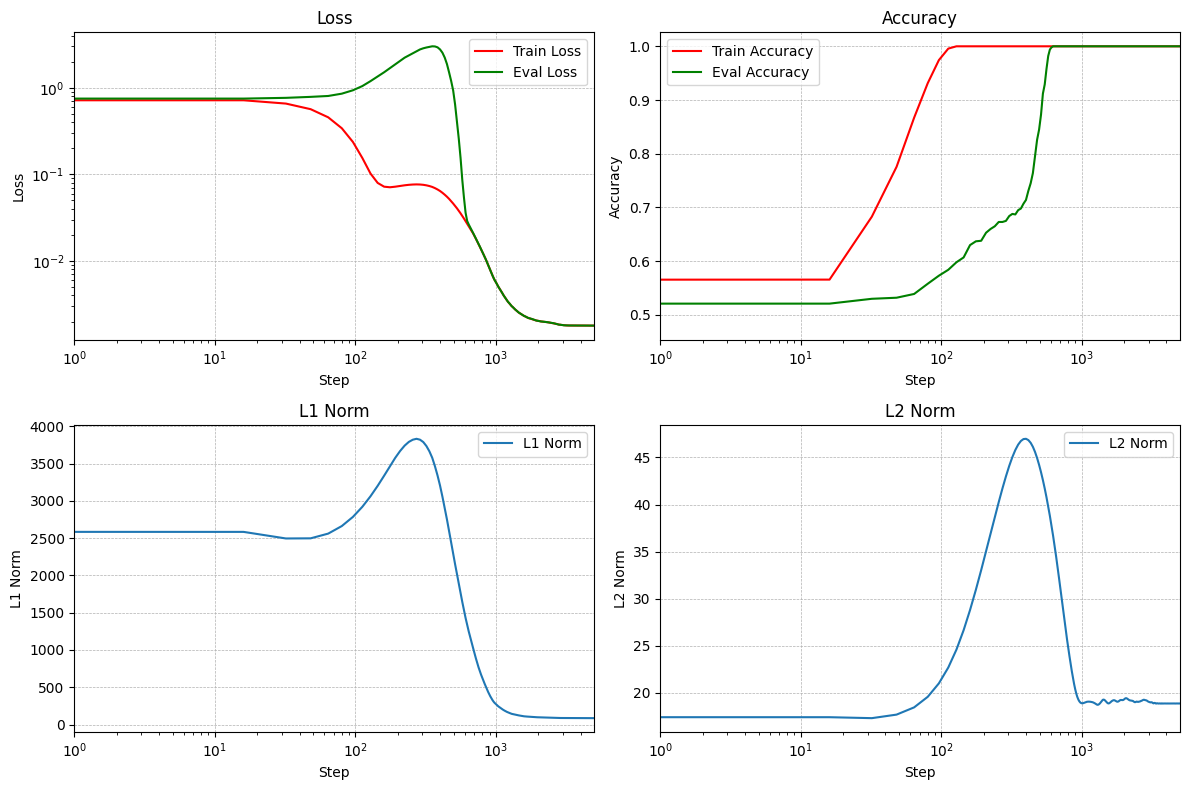

In [ ]:
# 訓練の可視化
def plot_training(all_metrics):
    steps = [m['step'] for m in all_metrics]

    plt.figure(figsize=(12, 8))

    # Loss
    plt.subplot(2, 2, 1)
    train_loss = [m['train_loss'] for m in all_metrics]
    eval_loss = [m['eval_loss'] for m in all_metrics]
    plt.semilogx(steps, train_loss, label='Train Loss', color='red')
    plt.semilogx(steps, eval_loss, label='Eval Loss', color='green')
    plt.yscale('log')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # Accuracy (Train and Eval)
    plt.subplot(2, 2, 2)
    train_acc = [m['train_acc'] for m in all_metrics]
    eval_acc = [m['eval_acc'] for m in all_metrics]
    plt.semilogx(steps, train_acc, label='Train Accuracy', color='red')
    plt.semilogx(steps, eval_acc, label='Eval Accuracy', color='green')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L1 Norm
    plt.subplot(2, 2, 3)
    l1_norm = [m['l1_norm'] for m in all_metrics]
    plt.semilogx(steps, l1_norm, label='L1 Norm')
    plt.xlabel('Step')
    plt.ylabel('L1 Norm')
    plt.legend()
    plt.title('L1 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L2 Norm
    plt.subplot(2, 2, 4)
    l2_norm = [m['l2_norm'] for m in all_metrics]
    plt.semilogx(steps, l2_norm, label='L2 Norm')
    plt.xlabel('Step')
    plt.ylabel('L2 Norm')
    plt.legend()
    plt.title('L2 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    plt.tight_layout()
    plt.show()

plot_training(all_metrics)

Visualizing weights from checkpoint checkpoints/checkpoint_step_1.pt


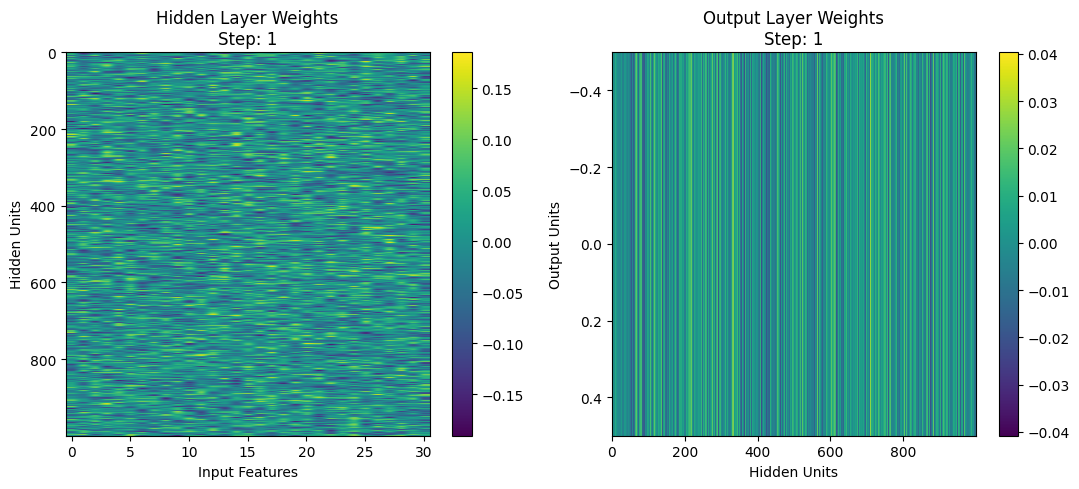

Visualizing weights from checkpoint checkpoints/checkpoint_step_4999.pt


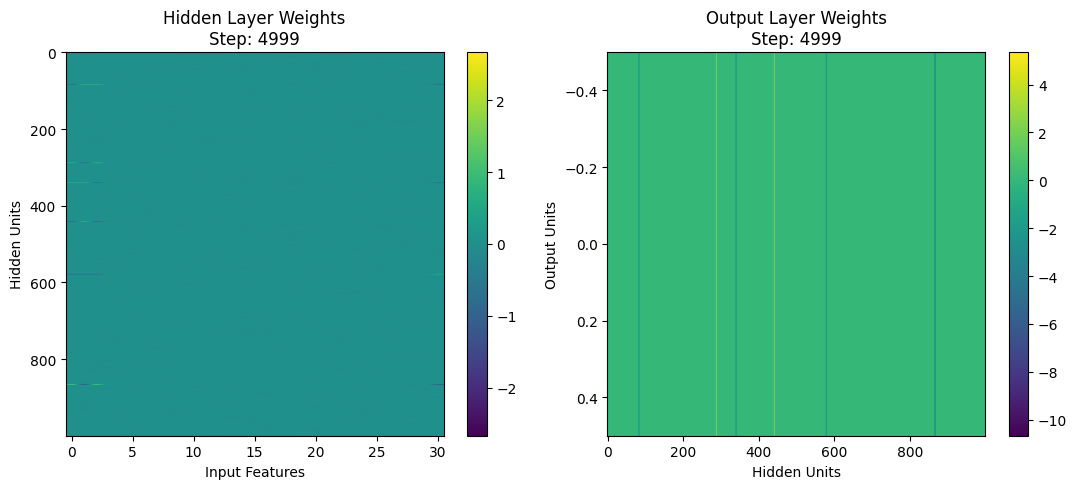

In [ ]:
# モデルの重みの可視化
def visualize_weights(model, state_dict=None, step=None):
    if state_dict is not None:
        model.load_state_dict(state_dict)

    with torch.no_grad():
        hidden_weights = model.hidden.weight.cpu().numpy()
        output_weights = model.out.weight.cpu().numpy()

        plt.figure(figsize=(11, 5))

        # Hidden layer weights
        plt.subplot(1, 2, 1)
        plt.imshow(hidden_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Hidden Layer Weights\nStep: {step}' if step is not None else 'Hidden Layer Weights')
        plt.xlabel('Input Features')
        plt.ylabel('Hidden Units')

        # Output layer weights
        plt.subplot(1, 2, 2)
        plt.imshow(output_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Output Layer Weights\nStep: {step}' if step is not None else 'Output Layer Weights')
        plt.xlabel('Hidden Units')
        plt.ylabel('Output Units')

        plt.tight_layout()
        plt.show()

# 特定の時刻の重みを可視化
def visualize_checkpoint_weights(checkpoint_step):
    # チェックポイントのファイルパスを検索
    checkpoint_path = next((p for p in saved_checkpoints if f'checkpoint_step_{checkpoint_step}.pt' in p), None)
    if checkpoint_path is not None:
        print(f"Visualizing weights from checkpoint {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path)
        visualize_weights(model, state_dict=checkpoint['state_dict'], step=checkpoint_step)
    else:
        print(f"No checkpoint found for step {checkpoint_step}")

# 最終ステップのチェックポイントを視覚化する関数
def visualize_final_checkpoint_weights():
    # 最終ステップのチェックポイントファイルを見つける
    if not saved_checkpoints:
        print("No checkpoints found.")
        return

    final_checkpoint_step = max(int(p.split('_')[-1].split('.')[0]) for p in saved_checkpoints)
    visualize_checkpoint_weights(final_checkpoint_step)

visualize_checkpoint_weights(1)
visualize_final_checkpoint_weights()

# 中間層の幅を 1000．その他なし

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
import time

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

hyper = {
    'n': 30,
    'k': 3,
    'train_size': 700,
    'test_size': 1000,
    'hidden_size': int(1000),
    'loss_fn': 'cross_entropy',  # cross_entropy, hinge
    'optimizer': 'vanilla_gd',         # sgd, adam, admw, vanilla_gd
    'regularization': 'none',      # l1, l2. 正則化を行わない場合は 'none'
    'weight_decay': 0,       # Weight decay を行わない場合は 0
    'learning_rate': 0.006,
    'warm_up_steps': 1,
    'b1': .99,
    'b2': .98,
    'log_every': 16,
    'save_every': 1,
    'max_steps': 5000,
    'seed': 5,
    'checkpoint_dir': 'checkpoints',
}

np.random.seed(hyper['seed'])

# 訓練データとテストデータを合わせたサンプル数を設定
total_size = hyper['train_size'] + hyper['test_size']

unique_binary_strings = set()

# 十分な数集まるまで繰り返す
while len(unique_binary_strings) < total_size:
    binary_string = tuple(np.random.randint(2, size=hyper['n']))
    unique_binary_strings.add(binary_string)

# NumPy 配列に変換
inputs = np.array(list(unique_binary_strings), dtype=np.float32)

# 出力ラベルを計算
outputs = np.sum(inputs[:, :hyper['k']], axis=-1) % 2
ones_column = np.ones((inputs.shape[0], 1), dtype=np.float32)
inputs = np.concatenate((inputs, ones_column), axis=1)

# データのインデックスをランダムに並べ替えてデータシャッフル
indices = np.random.permutation(len(inputs))
split_idx = int(hyper['train_size'])

# 訓練データとテストデータを分割
train_batch = (torch.tensor(inputs[indices[:split_idx]]).to(device), torch.tensor(outputs[indices[:split_idx]]).to(device))
eval_batch = (torch.tensor(inputs[indices[split_idx:]]).to(device), torch.tensor(outputs[indices[split_idx:]]).to(device))

# モデル定義
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(hyper['n'] + 1, hidden_size, bias=False)
        self.out = nn.Linear(hidden_size, 1, bias=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        return self.out(x).squeeze()

model = Net(hyper['hidden_size']).to(device)

# 損失関数の設定
if hyper['loss_fn'] == 'cross_entropy':
    loss_fn = nn.BCEWithLogitsLoss()
elif hyper['loss_fn'] == 'hinge':
    loss_fn = nn.HingeEmbeddingLoss()

# オプティマイザの設定
if hyper['optimizer'] == 'sgd':
    optimizer = optim.SGD(model.parameters(), lr=hyper['learning_rate'])
elif hyper['optimizer'] == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=hyper['learning_rate'], betas=(hyper['b1'], hyper['b2']))
elif hyper['optimizer'] == 'adamw':
    optimizer = optim.AdamW(model.parameters(), lr=hyper['learning_rate'], weight_decay=hyper['weight_decay'])
elif hyper['optimizer'] == 'vanilla_gd':
    # vanilla_GD の場合は手動で勾配降下を行う
    pass

# L1正則化の関数
def l1_regularization(model, weight_decay):
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    return weight_decay * l1_norm

# L2正則化の関数
def l2_regularization(model, weight_decay):
    l2_norm = sum(param.pow(2.0).sum() for param in model.parameters())
    return weight_decay * l2_norm

# トレーニング関数
def train_step(batch):
    model.train()
    optimizer.zero_grad() if hyper['optimizer'] != 'vanilla_gd' else None
    inputs, targets = batch
    outputs = model(inputs)
    loss = loss_fn(outputs, targets.float())

    # 正則化の追加
    if hyper['regularization'] == 'l1':
        loss += l1_regularization(model, hyper['weight_decay'])
    elif hyper['regularization'] == 'l2':
        loss += l2_regularization(model, hyper['weight_decay'])

    loss.backward()

    if hyper['optimizer'] == 'vanilla_gd':
        with torch.no_grad():
            for param in model.parameters():
                # 勾配に正則化のペナルティを加え，パラメータを更新
                if hyper['regularization'] == 'l1':
                    param.grad += hyper['weight_decay'] * torch.sign(param)
                elif hyper['regularization'] == 'l2':
                    param.grad += hyper['weight_decay'] * param
                param -= hyper['learning_rate'] * param.grad
    else:
        optimizer.step()

    preds = torch.sigmoid(outputs) > 0.5
    accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# 評価関数
def eval_step(batch):
    model.eval()
    inputs, targets = batch
    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, targets.float())

        # 正則化の追加
        if hyper['regularization'] == 'l1':
            loss += l1_regularization(model, hyper['weight_decay'])
        elif hyper['regularization'] == 'l2':
            loss += l2_regularization(model, hyper['weight_decay'])

        preds = torch.sigmoid(outputs) > 0.5
        accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# チェックポイントのディレクトリを作成
if not os.path.exists(hyper['checkpoint_dir']):
    os.makedirs(hyper['checkpoint_dir'])

# トレーニングと評価の記録用
all_metrics = []
saved_checkpoints = []

# トレーニングループ
for step in range(hyper['max_steps']):
    train_loss, train_acc = train_step(train_batch)

    if step % hyper['log_every'] == 0:
        eval_loss, eval_acc = eval_step(eval_batch)
        l1_norm = sum(param.abs().sum().item() for param in model.parameters())
        l2_norm = np.sqrt(sum(param.pow(2.0).sum().item() for param in model.parameters()))
        metrics = {
            'step': step,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'eval_loss': eval_loss,
            'eval_acc': eval_acc,
            'l1_norm': l1_norm,
            'l2_norm': l2_norm
        }
        all_metrics.append(metrics)

        # ログメッセージの表示
        print(f"Step {step}/{hyper['max_steps']}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Eval Loss = {eval_loss:.4f}, Eval Acc = {eval_acc:.4f}")

    if step % hyper['save_every'] == 0:
        checkpoint_path = os.path.join(hyper['checkpoint_dir'], f'checkpoint_step_{step}.pt')
        torch.save({'step': step, 'state_dict': model.state_dict()}, checkpoint_path)
        saved_checkpoints.append(checkpoint_path)

Using device: cpu
Step 0/5000: Train Loss = 0.6971, Train Acc = 0.4929, Eval Loss = 0.6970, Eval Acc = 0.5040
Step 16/5000: Train Loss = 0.6851, Train Acc = 0.5629, Eval Loss = 0.6956, Eval Acc = 0.5090
Step 32/5000: Train Loss = 0.6744, Train Acc = 0.5500, Eval Loss = 0.7077, Eval Acc = 0.4960
Step 48/5000: Train Loss = 0.6597, Train Acc = 0.6057, Eval Loss = 0.7247, Eval Acc = 0.4860
Step 64/5000: Train Loss = 0.6596, Train Acc = 0.6214, Eval Loss = 0.7525, Eval Acc = 0.4970
Step 80/5000: Train Loss = 0.6488, Train Acc = 0.6343, Eval Loss = 0.7722, Eval Acc = 0.5040
Step 96/5000: Train Loss = 0.6361, Train Acc = 0.6486, Eval Loss = 0.7810, Eval Acc = 0.5110
Step 112/5000: Train Loss = 0.6043, Train Acc = 0.6971, Eval Loss = 0.7561, Eval Acc = 0.5200
Step 128/5000: Train Loss = 0.5787, Train Acc = 0.7271, Eval Loss = 0.7314, Eval Acc = 0.5220
Step 144/5000: Train Loss = 0.5464, Train Acc = 0.8029, Eval Loss = 0.7125, Eval Acc = 0.5290
Step 160/5000: Train Loss = 0.5201, Train Acc = 0.

汎化できず

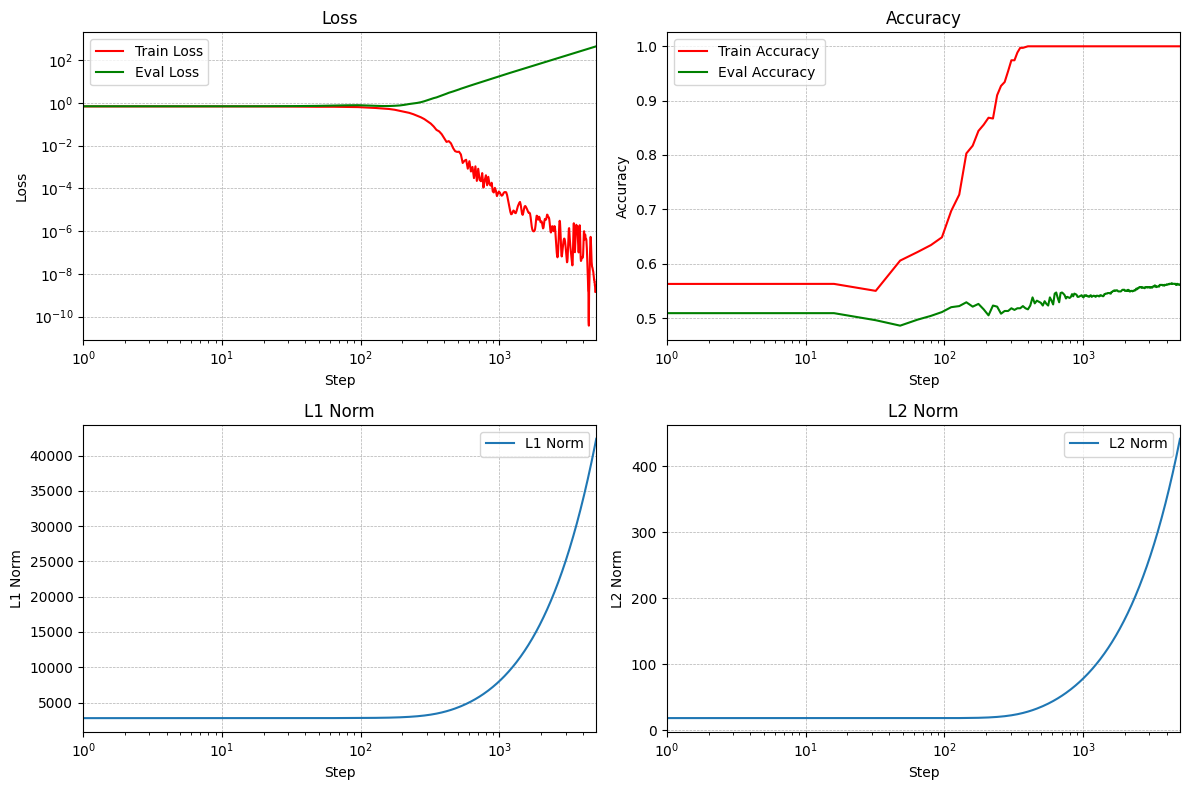

In [ ]:
# 訓練の可視化
def plot_training(all_metrics):
    steps = [m['step'] for m in all_metrics]

    plt.figure(figsize=(12, 8))

    # Loss
    plt.subplot(2, 2, 1)
    train_loss = [m['train_loss'] for m in all_metrics]
    eval_loss = [m['eval_loss'] for m in all_metrics]
    plt.semilogx(steps, train_loss, label='Train Loss', color='red')
    plt.semilogx(steps, eval_loss, label='Eval Loss', color='green')
    plt.yscale('log')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # Accuracy (Train and Eval)
    plt.subplot(2, 2, 2)
    train_acc = [m['train_acc'] for m in all_metrics]
    eval_acc = [m['eval_acc'] for m in all_metrics]
    plt.semilogx(steps, train_acc, label='Train Accuracy', color='red')
    plt.semilogx(steps, eval_acc, label='Eval Accuracy', color='green')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L1 Norm
    plt.subplot(2, 2, 3)
    l1_norm = [m['l1_norm'] for m in all_metrics]
    plt.semilogx(steps, l1_norm, label='L1 Norm')
    plt.xlabel('Step')
    plt.ylabel('L1 Norm')
    plt.legend()
    plt.title('L1 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    # L2 Norm
    plt.subplot(2, 2, 4)
    l2_norm = [m['l2_norm'] for m in all_metrics]
    plt.semilogx(steps, l2_norm, label='L2 Norm')
    plt.xlabel('Step')
    plt.ylabel('L2 Norm')
    plt.legend()
    plt.title('L2 Norm')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(1, max(steps))

    plt.tight_layout()
    plt.show()

plot_training(all_metrics)

Visualizing weights from checkpoint checkpoints/checkpoint_step_1.pt


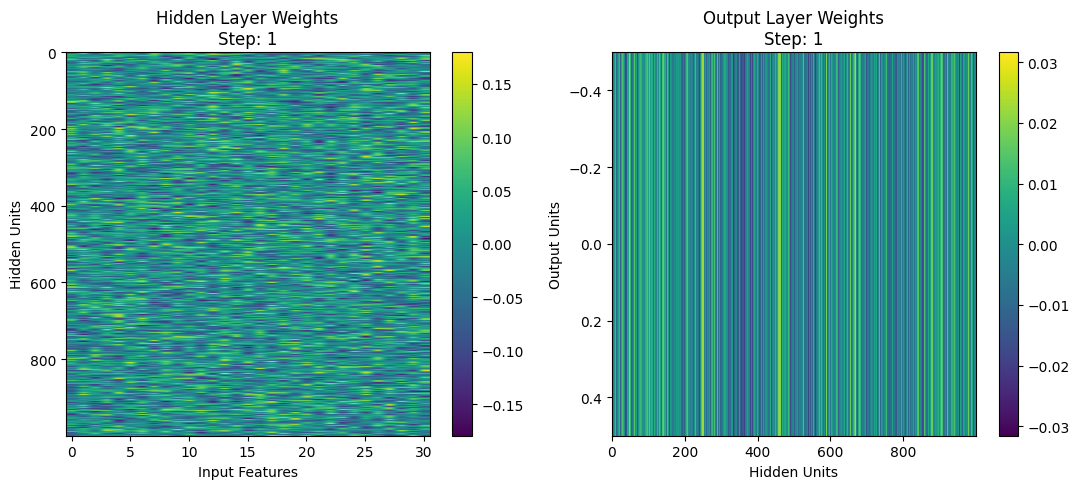

Visualizing weights from checkpoint checkpoints/checkpoint_step_4999.pt


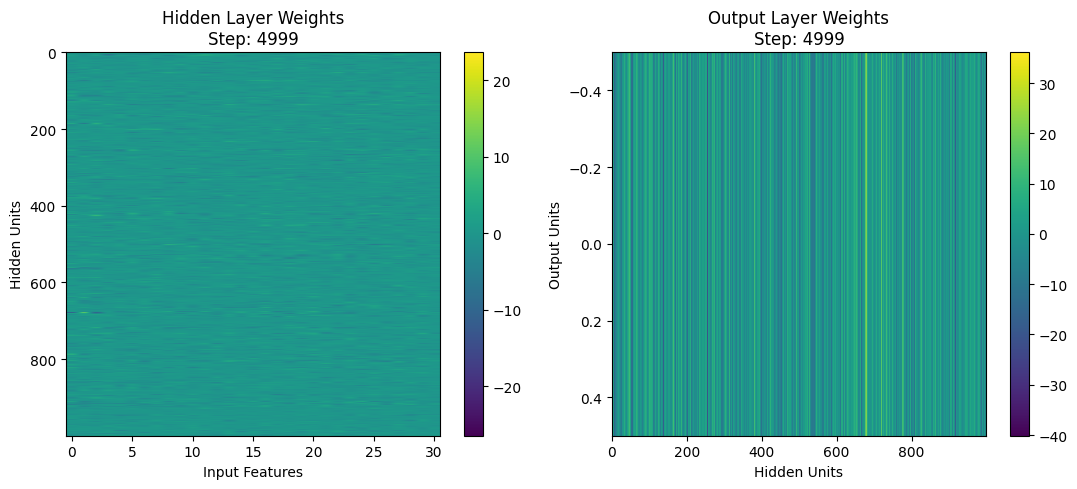

In [ ]:
# モデルの重みの可視化
def visualize_weights(model, state_dict=None, step=None):
    if state_dict is not None:
        model.load_state_dict(state_dict)

    with torch.no_grad():
        hidden_weights = model.hidden.weight.cpu().numpy()
        output_weights = model.out.weight.cpu().numpy()

        plt.figure(figsize=(11, 5))

        # Hidden layer weights
        plt.subplot(1, 2, 1)
        plt.imshow(hidden_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Hidden Layer Weights\nStep: {step}' if step is not None else 'Hidden Layer Weights')
        plt.xlabel('Input Features')
        plt.ylabel('Hidden Units')

        # Output layer weights
        plt.subplot(1, 2, 2)
        plt.imshow(output_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Output Layer Weights\nStep: {step}' if step is not None else 'Output Layer Weights')
        plt.xlabel('Hidden Units')
        plt.ylabel('Output Units')

        plt.tight_layout()
        plt.show()

# 特定の時刻の重みを可視化
def visualize_checkpoint_weights(checkpoint_step):
    # チェックポイントのファイルパスを検索
    checkpoint_path = next((p for p in saved_checkpoints if f'checkpoint_step_{checkpoint_step}.pt' in p), None)
    if checkpoint_path is not None:
        print(f"Visualizing weights from checkpoint {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path)
        visualize_weights(model, state_dict=checkpoint['state_dict'], step=checkpoint_step)
    else:
        print(f"No checkpoint found for step {checkpoint_step}")

# 最終ステップのチェックポイントを視覚化する関数
def visualize_final_checkpoint_weights():
    # 最終ステップのチェックポイントファイルを見つける
    if not saved_checkpoints:
        print("No checkpoints found.")
        return

    final_checkpoint_step = max(int(p.split('_')[-1].split('.')[0]) for p in saved_checkpoints)
    visualize_checkpoint_weights(final_checkpoint_step)

visualize_checkpoint_weights(1)
visualize_final_checkpoint_weights()